###### Introduction
The purpose of this project is to provide 5 best zip codes to invest in real estate. Zillow monthly median price data from 1996 to 2018 will be used for this analysis.



###### Filtering the zip codes: 
The real estate market is known for its ups and downs with the ever-changing economic conditions.
To choose the best zip codes, some of the main factors which affects the  housing price are analyzed using census data. These factors are
Population growth,Job growth,Rent index & Vacancy rate. The average rate of increase(ROI) for the last 4 years will be calculated. Among the stats with high ROI those with high population growth , job growth & rent index & low vacancy rate & will be filtered. 


Steps for ARIMA implementation 

###### 1. import necessary library & load the data: 

###### 2. Preprocessing:

###### 3.Make series stationary: 

###### 4. Determine d value: 

###### 5.Create ACF and PACF plots: 

###### 6.Determine the p and q values: 

###### 7.Predict values on validation set: 

###### 8.Calculate RMSE: 

# Import the necessary libraries & Load the data:
The first step for model building is to load the dataset & import libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
import warnings
warnings.filterwarnings('ignore')
import itertools
import statsmodels.api as sm
import pmdarima as pm
plt.style.use('ggplot')


In [2]:
# to work with the Auto arima method
!pip install pmdarima

fbprophet 0.5 requires setuptools-git>=1.2, which is not installed.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Calculate ROI & select zip codes with the highest ROI

In [4]:
ts = pd.read_csv("zillow_data.csv")
ts.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

In [5]:
# function to get rate of increase
def get_roi(data , year):
    beggining = year + '-01'
    if year =='2018':
        ending = year +'-04'
    else:
        ending = year + '-12'
    return data[[beggining,ending]].apply(lambda x : ((x[1]-x[0])/x[0])*100, axis =1)

In [6]:
for year in ['2015','2016','2017','2018']:
    col_name= 'roi_'+ year
    ts[col_name] = get_roi(ts,year)

In [8]:
ts[['roi_2015','roi_2016','roi_2017','roi_2018','RegionName','City','State']].head(15)


,roi_2015,roi_2016,roi_2017,roi_2018,RegionName,City,State
0,6.494961,4.850394,2.176530,0.605232,60657,Chicago,IL
1,10.182975,7.592659,5.252660,1.163156,75070,McKinney,TX
2,8.087504,-0.855484,-0.772320,2.708593,77494,Katy,TX
3,4.267256,3.022670,2.074493,0.330084,60614,Chicago,IL
4,1.394943,0.086059,2.908469,0.997506,79936,El Paso,TX
5,7.843137,4.211230,4.025559,0.921376,77084,Houston,TX
6,9.283820,3.938495,6.971340,0.966417,10467,New York,NY
7,9.694956,1.551654,3.789193,0.552344,60640,Chicago,IL
8,9.361702,7.943626,2.376708,1.673399,77449,Katy,TX
9,7.564791,-1.637631,1.635332,1.132386,94109,San Francisco,CA


In [9]:
# calculate the average of the ROI calculated for each year
ts['roi_average_2015_2018']  =  ts[['roi_2015','roi_2016','roi_2017','roi_2018']].mean(axis=1)


In [10]:
# include the other columns 
roi_by_zipcode = ts[['roi_2015','roi_2016','roi_2017','roi_2018','roi_average_2015_2018','RegionName','City','State']]


In [11]:
roi_above_15 = roi_by_zipcode.query("roi_average_2015_2018 > 15 ")
roi_above_15.sort_values('roi_average_2015_2018', ascending = False).head(40)

,roi_2015,roi_2016,roi_2017,roi_2018,roi_average_2015_2018,RegionName,City,State
13409,14.111498,27.191679,37.149270,13.665087,23.029384,27980,Hertford,NC
842,24.841772,14.591195,32.934783,8.373206,20.185239,30032,Candler-Mcafee,GA
1463,23.500612,31.225681,16.375546,2.361715,18.365889,34207,Bradenton,FL
4554,16.179337,15.066225,36.619718,3.535354,17.850159,33805,Lakeland,FL
2347,35.040431,17.450980,15.561016,2.498265,17.637673,32205,Jacksonville,FL
4293,7.006369,19.879518,36.185819,7.360862,17.608142,66104,Kansas City,KS
3229,11.201299,18.958032,35.349941,4.741379,17.562663,32117,Holly Hill,FL
2661,22.485876,17.183348,24.701493,5.410226,17.445236,33705,Saint Petersburg,FL
6563,33.611691,16.858238,10.434219,8.051342,17.238872,15201,Pittsburgh,PA
6105,16.823228,26.300578,22.228475,3.283174,17.158864,37210,Nashville,TN


## Filter the sates using census data

In [12]:
#   create a Data frame  using census data. link fot the source of these data is attached.

data = {'State':['NC', 'GA', 'FL', 'KS', 'PA', 'CA','TX'], 'pop_growth':[10, 14, 5, 42,39,25,16],'employment_rate':[2.3,1.7,2.5,1.5,0,1.9,2.4], 'vacancy_rate':[7.1,7.1,8.2,10.5,6.7,4.1,8.9], 'rent_index':[1210,1278,1587,1030,1222,2517,1449]} 
  
# Create DataFrame 
proposed_states = pd.DataFrame(data) 
proposed_states


#

,State,pop_growth,employment_rate,vacancy_rate,rent_index
0,NC,10,2.3,7.1,1210
1,GA,14,1.7,7.1,1278
2,FL,5,2.5,8.2,1587
3,KS,42,1.5,10.5,1030
4,PA,39,0.0,6.7,1222
5,CA,25,1.9,4.1,2517
6,TX,16,2.4,8.9,1449


###### https://www.bls.gov/news.release/laus.nr0.htm
###### https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html#par_textimage 
###### https://www.census.gov/housing/hvs/files/annual18/ann18t_3.xlsx vacancy rate
###### https://www.usatoday.com/list/news/50-states/monthly-rent-by-state/6edf40b2-ca12-4902-84df-522c46b8f029/?block=texas rent index

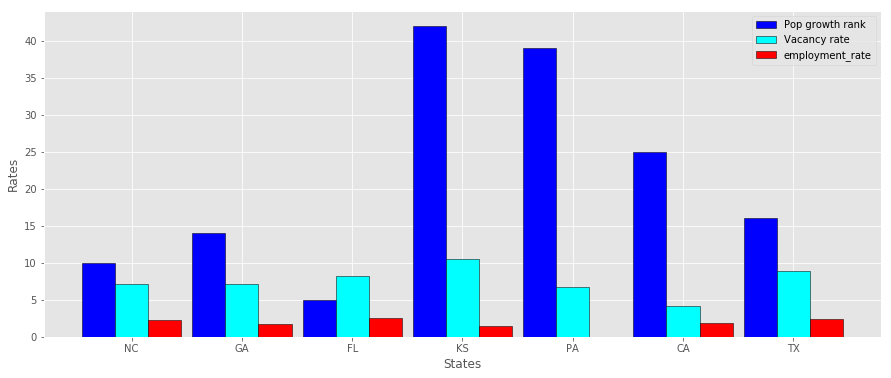

In [178]:
# width of the bars
width = 0.3
# Choose the height of the blue bars
bars1 = proposed_states['pop_growth']
# Choose the height of the cyan bars
bars2 = proposed_states['vacancy_rate']
bars3 = proposed_states['employment_rate']
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
plt.bar(r1, bars1, width = width, color = 'blue', edgecolor = 'black', capsize=7, label='Pop growth rank')
plt.bar(r2, bars2, width = width, color = 'cyan', edgecolor = 'black', capsize=7, label='Vacancy rate') 
plt.bar(r3, bars3, width = width, color = 'red', edgecolor = 'black', capsize=7, label='employment_rate') 

plt.xticks([r + width for r in range(len(bars1))], ['NC', 'GA', 'FL', 'KS', 'PA', 'CA','TX'])
plt.ylabel('Rates')
plt.xlabel('States')
plt.legend()
plt.show()


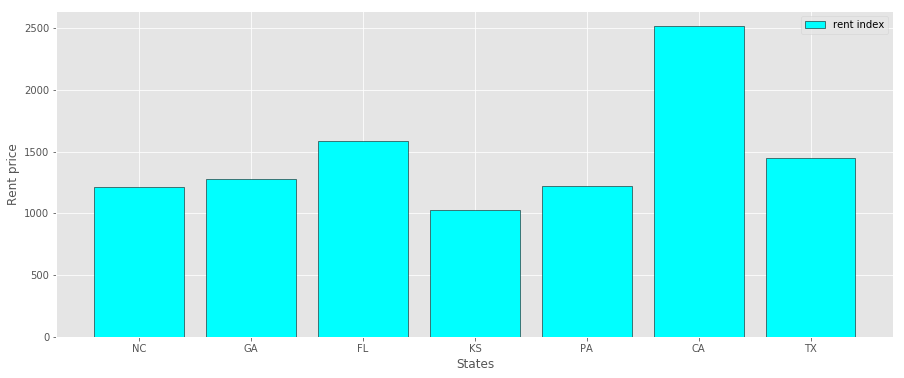

In [180]:
plt.bar(proposed_states['State'], proposed_states['rent_index'], color = 'cyan', edgecolor = 'black', capsize=7, label='rent index') 
plt.ylabel('Rent price')
plt.xlabel('States')
plt.legend()
plt.show()

The list of the of the best zip codes with less risk are:
###### zip code 27980 Hertfold, NC
###### zip code 30032 Candler-Mcafee,GA
###### zip code 33805 Lakeland, Fl
###### zip code 32117 Holly Hill,Fl
###### zip code 95134  San Jose , CA
###### zip code 28208  Charlotte , NC

###### https://www.bls.gov/news.release/laus.nr0.htm
###### https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html#par_textimage 
###### https://www.census.gov/housing/hvs/files/annual18/ann18t_3.xlsx vacancy rate
###### https://www.usatoday.com/list/news/50-states/monthly-rent-by-state/6edf40b2-ca12-4902-84df-522c46b8f029/?block=texas rent index


In [13]:
# to change datafrom wide to long format to change time to date index
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID','RegionName' ,'City', 'State', 'Metro', 'CountyName','SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

# Data Preprocessing: 
While working with time series data in Python, it's important to always ensure that dates are used as index values and are understood by Python as a true "date" object. We can do this by using pandas datestamp or to_datetime method. 

# Check for stationarity: 
Most time series models require the data to be stationary. A time series is said to be stationary if its statistical properties such as mean, variance & covariance remain constant over time. The formal ways to check for this are plotting the data and do a visual analysis and use a statistical test. 
###### Visual: 
we can use the decomposition method which allows us to separately view seasonality (which could be daily, weekly, annual, etc), trend and random which is the variability in the data set after removing the effects of the seasonality and trend
###### Statistical test: 
To confirm our visual observation on the above plot, we will use the Dickey-Fuller Hypothesis testing.
###### Null Hypothesis: The series is not stationary.
###### Alternate Hypothesis: The series is stationary.
the following functions will be used to decompose the data & to test stationarity. 


In [19]:
def decompose(ts):
    from statsmodels.tsa.seasonal import seasonal_decompose
    decomposition = seasonal_decompose(ts)

    # Gather the trend, seasonality and noise of decomposed object
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot gathered statistics
    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(np.log(ts), label='Original', color="blue")
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color="blue")
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color="blue")
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color="blue")
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    

In [21]:
# to check fot stationarity
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 4, center = False).mean()
    rolstd = TS.rolling(window = 4, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['value']) # change the passengers column as required 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None


# Make series stationery & determine the d value:
After the statistical test confirmed that the series is not stationary, the next step is to remove the trend and make the series stationary. One of the most common methods of dealing with removing both the trend and seasonality is differencing and the number of times the differencing was performed to make the series stationary is the d value.

 
# Create ACF and PACF plots & determine the p and q values: 
The Partial Autocorrelation Function ( PACF) gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. The Autocorrelation Function gives the correlation of a time series with its own lagged values but without controlling the other lags.
The ACF plot for the AR(p) time series would be strong to a lag of p and remain stagnant for subsequent lag values, trailing off at some point as the effect is weakened. The PACF, on the other hand, describes the direct relationship between an observation and its lag. This generally leads to no correlation for lag values beyond p.
The ACF for the MA(q) process would show a strong correlation with recent values up to the lag of q, then an immediate decline to minimal or no correlation. For the PACF, the plot shows a strong relationship to the lag and then a tailing off to no correlation from the lag onwards. Below is the ACF & PACFplot for our stationary data. the following function will be used to plot the ACF & PACF.


In [22]:
# to plot Partial auto correlation &  auto correlation
def par_auto_corr(ts):
    from statsmodels.graphics.tsaplots import plot_acf
    from statsmodels.graphics.tsaplots import plot_pacf
    from matplotlib.pylab import rcParams

    rcParams['figure.figsize'] = 14, 5

    plot_acf(ts, lags = 10);

    plot_pacf(ts, lags = 10);



All of the above functions will be applies to all the zip codes using the following function. 

--------------------------27980-------------------------


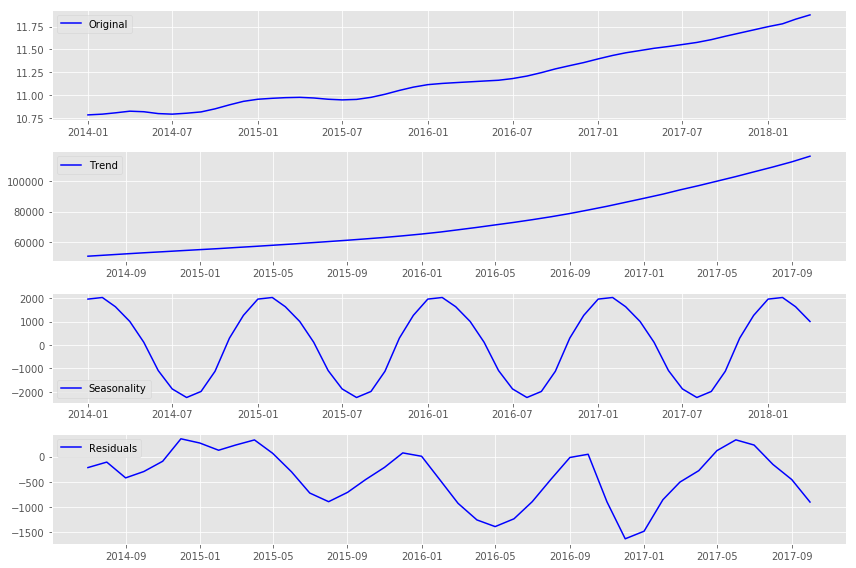

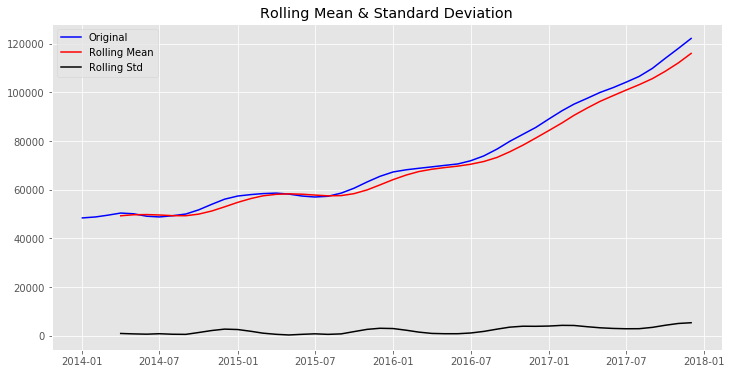

Results of Dickey-Fuller Test:
Test Statistic                  4.583970
p-value                         1.000000
#Lags Used                      5.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64
--------------------------30032-------------------------


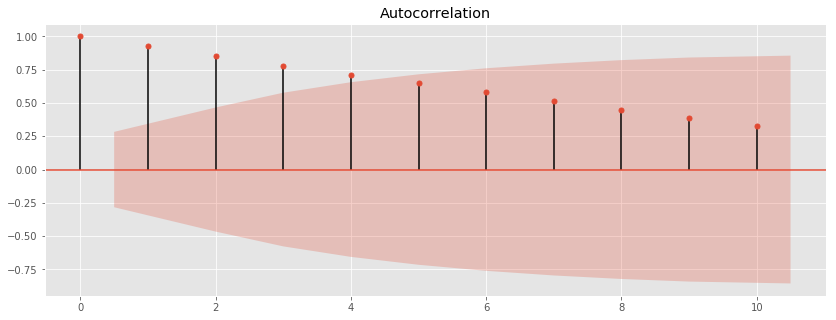

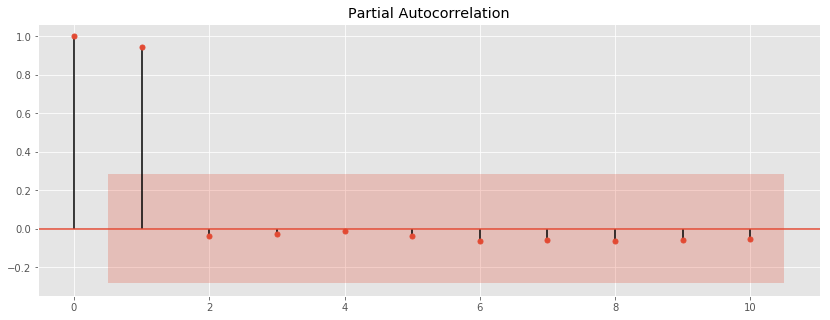

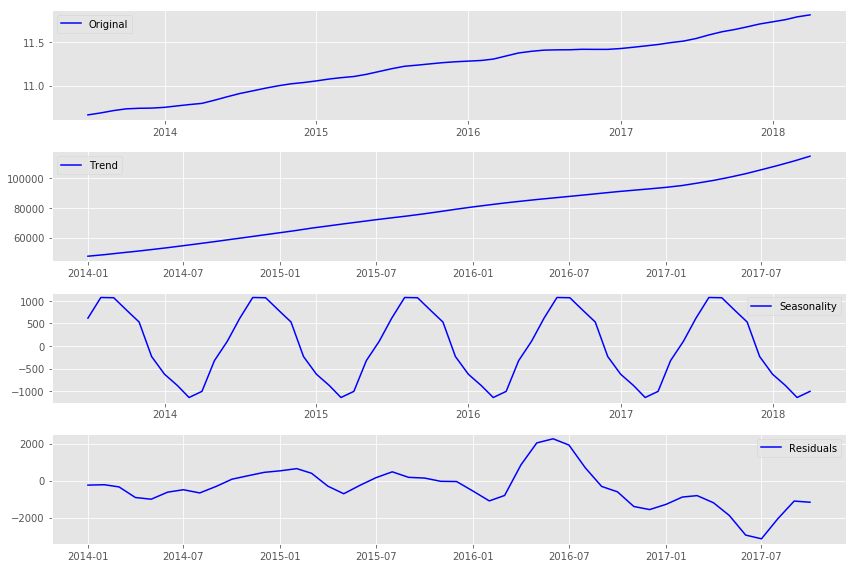

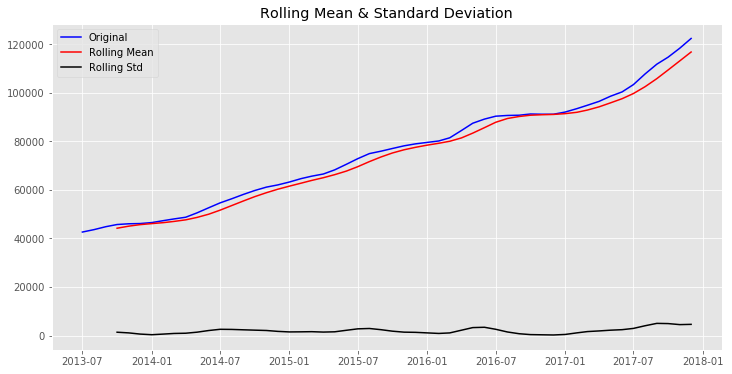

Results of Dickey-Fuller Test:
Test Statistic                  1.246115
p-value                         0.996290
#Lags Used                      4.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64
--------------------------33805-------------------------


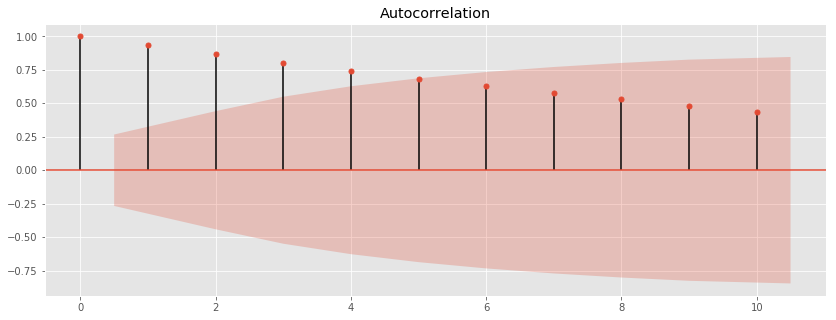

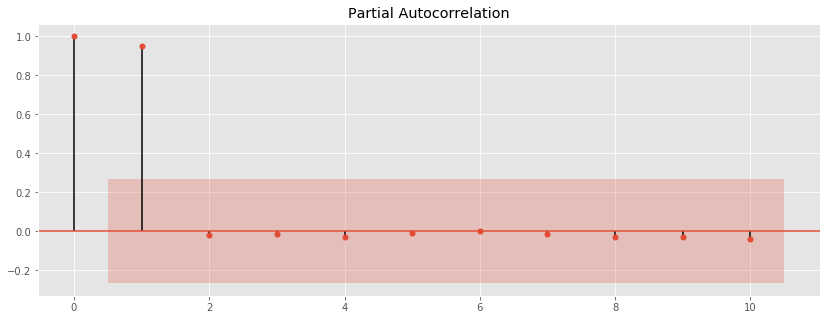

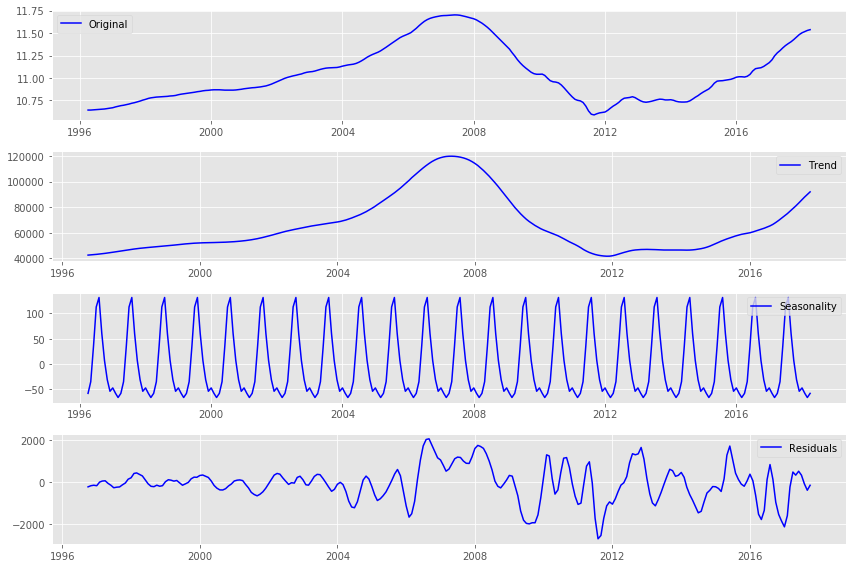

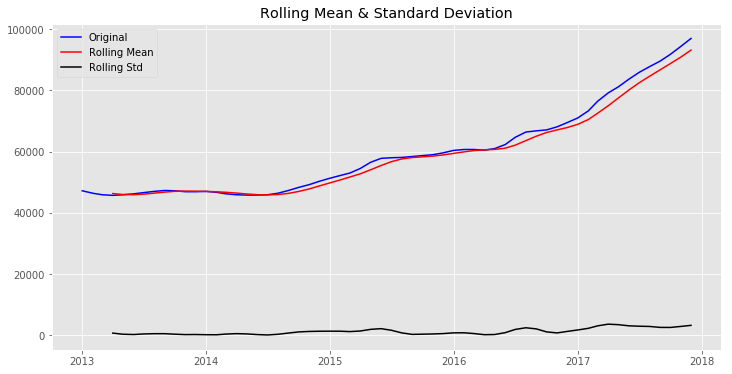

Results of Dickey-Fuller Test:
Test Statistic                  2.420257
p-value                         0.999020
#Lags Used                      4.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64
--------------------------32117-------------------------


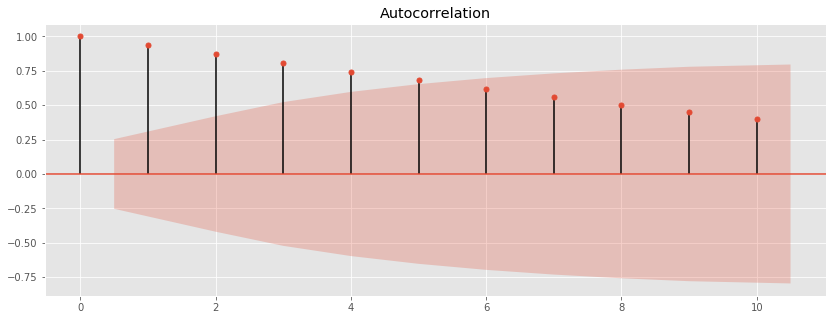

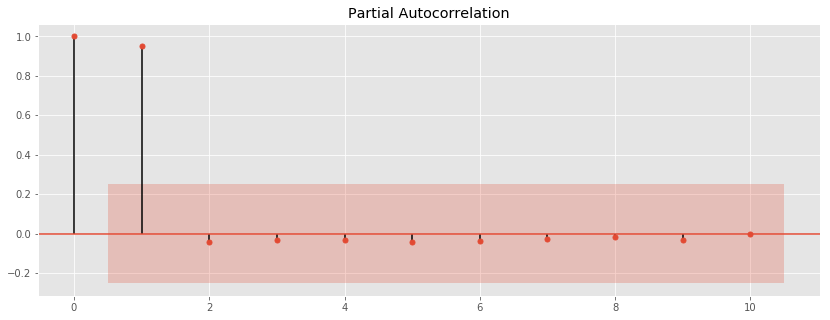

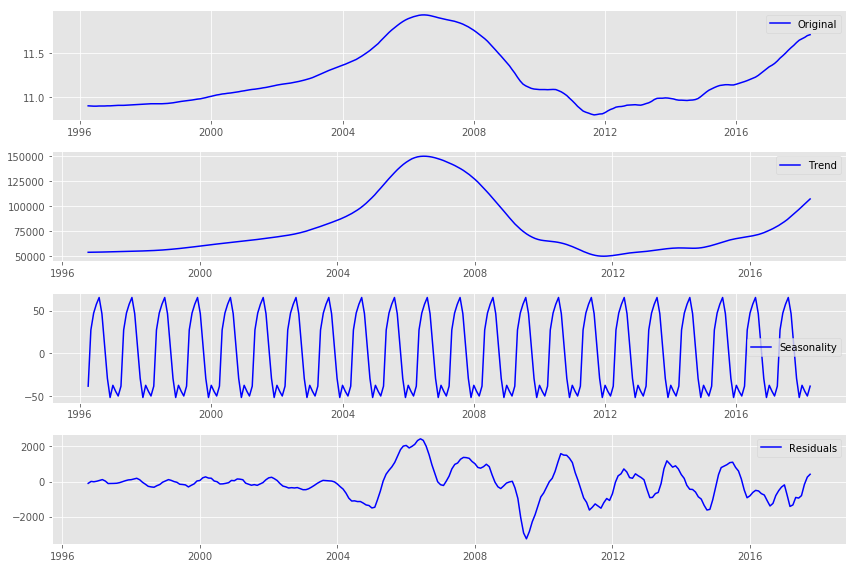

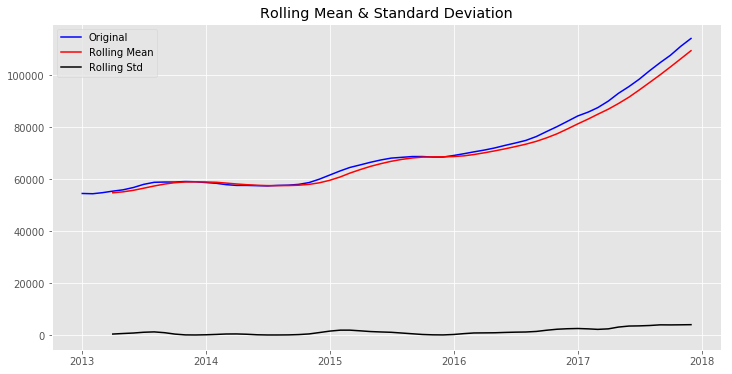

Results of Dickey-Fuller Test:
Test Statistic                  2.912014
p-value                         1.000000
#Lags Used                      7.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64
--------------------------95134-------------------------


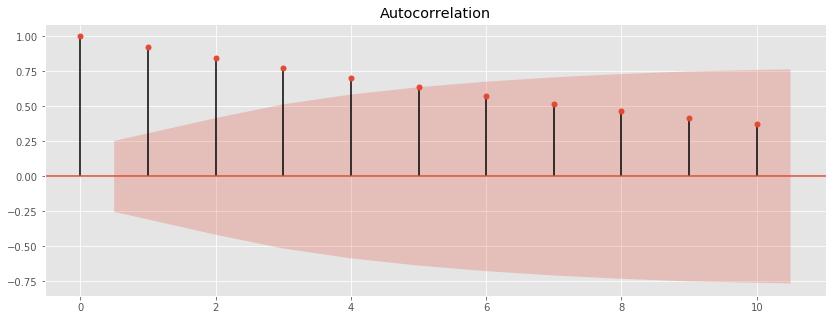

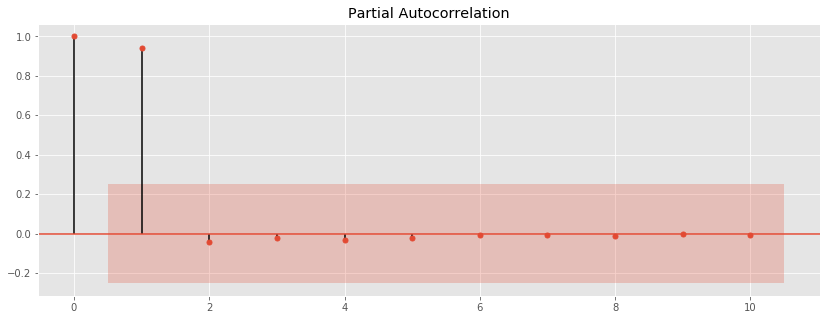

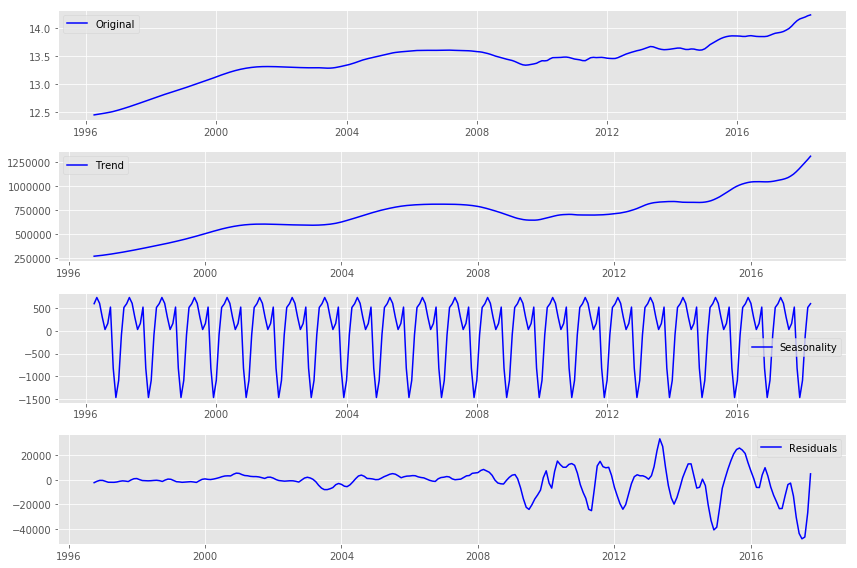

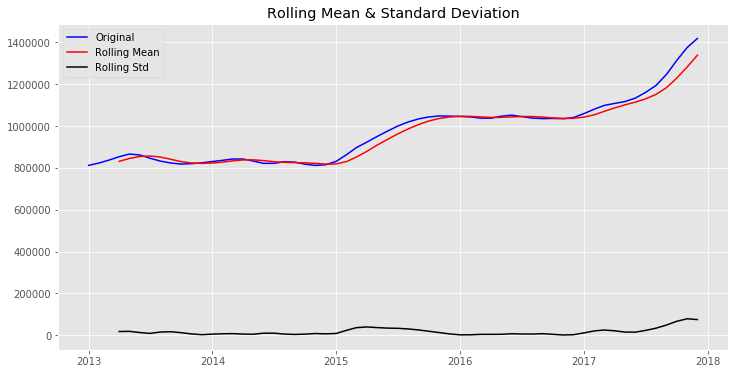

Results of Dickey-Fuller Test:
Test Statistic                  1.192909
p-value                         0.995937
#Lags Used                      4.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64
--------------------------28208-------------------------


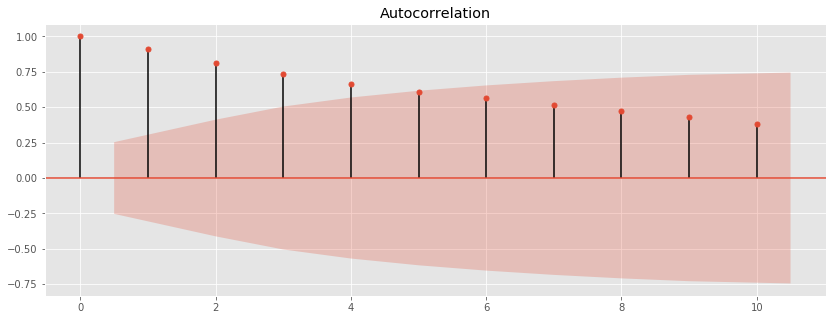

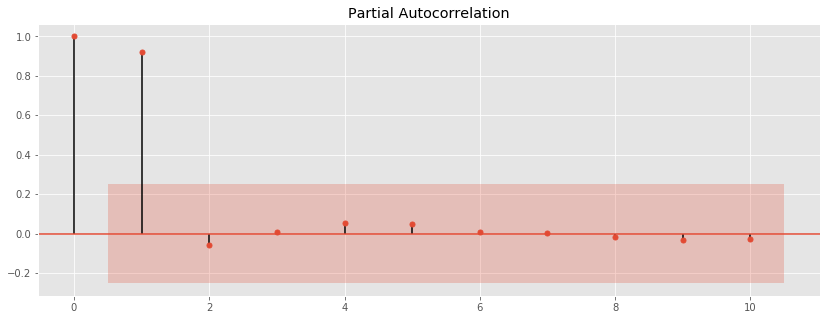

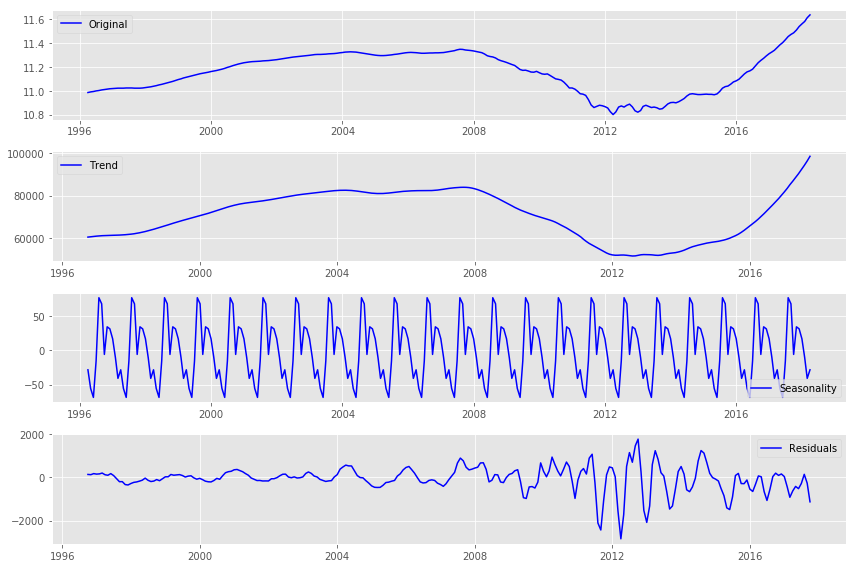

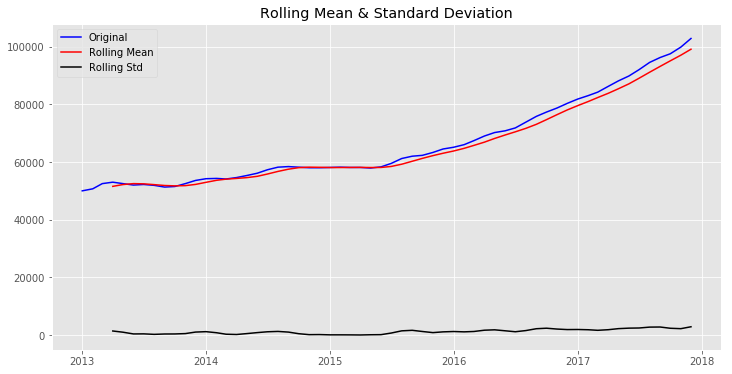

Results of Dickey-Fuller Test:
Test Statistic                  3.350386
p-value                         1.000000
#Lags Used                      4.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


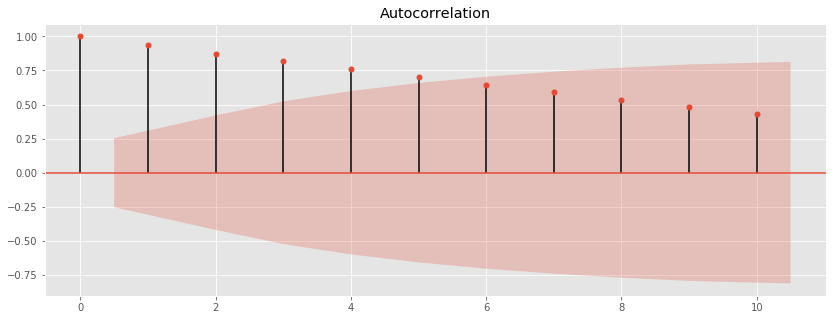

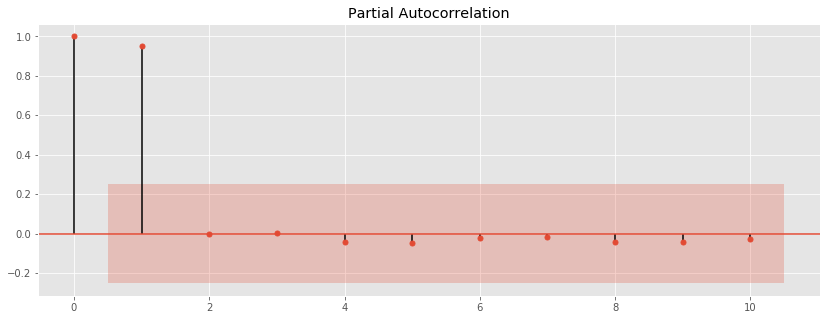

In [303]:
processed_data_dict ={}
for z in [27980,30032,33805,32117,95134,28208]:# list of all zip codes
    print ('--------------------------{}-------------------------'.format(z)) #print zip code name as head
    temp = ts.query("RegionName == {}".format(str(z)))# getting data only the specific zipcode
    temp.drop(columns=['roi_2015','roi_2016','roi_2017','roi_2018','roi_average_2015_2018'], axis = 1, inplace = True)# drop columns used to calculate roi 
    temp=melt_data(temp) # function to change to long format & to change it to date index
    decompose(temp)
    if z== 27980:
        temp =temp['2014-01-01':'2017-12-01']
    else:
        temp =temp['2013-01-01':'2017-12-01']
    stationarity_check(temp)
    par_auto_corr(temp)
    processed_data_dict[z]= temp # create a dict for each zip 

In [34]:
# renaming the zip codes to make the name simple
zip_codes=[27980,30032,33805,32117,95134,28208]
zip_27980 = processed_data_dict[27980] 
zip_30032 = processed_data_dict[30032] 
zip_33805 = processed_data_dict[33805] 
zip_32117 = processed_data_dict[32117] 
zip_95134 = processed_data_dict[95134] 
zip_28208 = processed_data_dict[28208] 

Both the visual plot & the statistical test with p value greater than .05 we fail to reject the null hypothesis which confirms that all of our zip codes are not stationary. Next we will fit ARIMA model for each zip code.   

## Zipcode 27980 Hertfold, NC


In [234]:
zip_27980.tail()

,value
time,
2017-12-01,122200.0
2018-01-01,126600.0
2018-02-01,130600.0
2018-03-01,137300.0
2018-04-01,143900.0


### Making data stationary & fit ARIMA

In [97]:
zip_27980_diff = zip_27980.diff(periods=4).dropna()


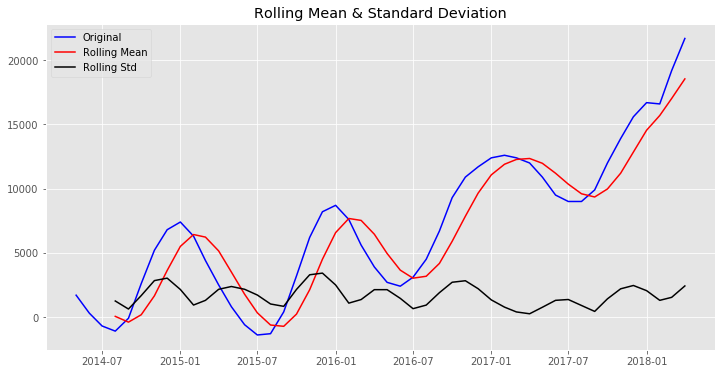

Results of Dickey-Fuller Test:
Test Statistic                  2.092484
p-value                         0.998782
#Lags Used                      6.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


In [98]:
stationarity_check(zip_27980_diff)

With p value greater than .05 we fail to reject the null hypothesis. The data is not stationary & we need to do more differencing.

In [100]:
zip_27980_twodiff = zip_27980_diff.diff(periods=1).dropna()

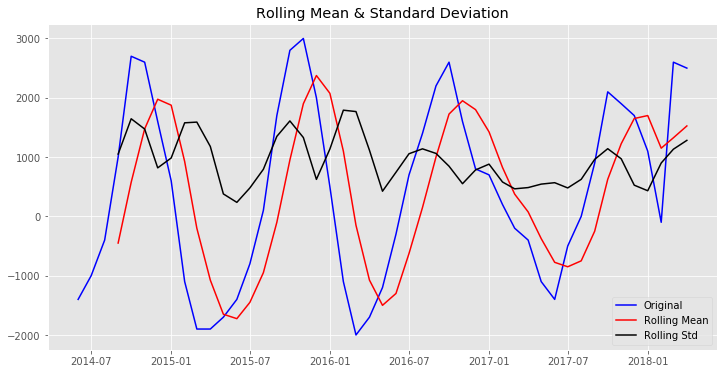

Results of Dickey-Fuller Test:
Test Statistic                 -4.170469
p-value                         0.000739
#Lags Used                      5.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


In [101]:
stationarity_check(zip_27980_twodiff)

With p value less than .05 we reject the null. Our data is stationary now.  It needed two step differencing to make the data stationary that means our d value is 2. 

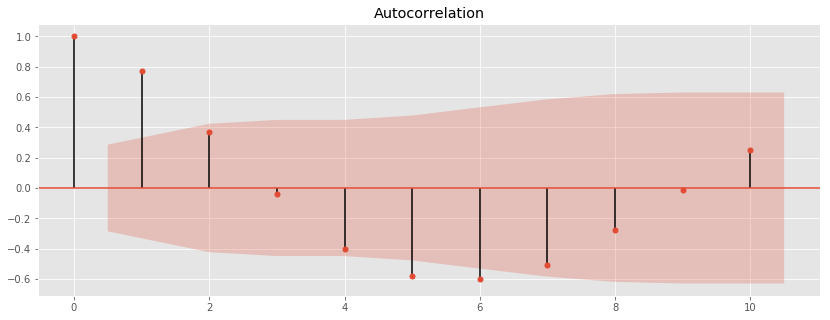

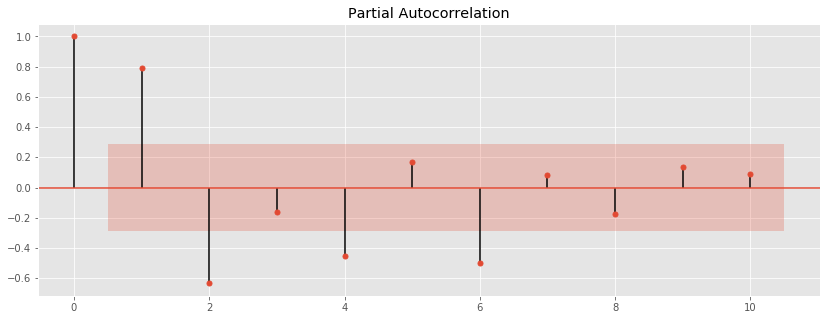

In [103]:
par_auto_corr(zip_27980_twodiff)

Fit ARIMA on the stationary data (zip_27980_twodiff)

In [70]:
# def sarima_param(ts):

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(zip_27980_twodiff ,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))

        except:
            continue
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()] 

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =809.8119832401671
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =1152.234569710637
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =574.4808045854759
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =587.179217392643
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =1222.639493791067
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =399.3090796363908
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =747.7188972271406
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =3169.074948300278
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =533.6683860572164
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =562.1440641435183
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =nan
ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =381.7968995005404
ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =747.3120890086012
ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =1552.644651914121
ARIMA (0, 1, 0) x (0, 1, 0, 12)12 :

pdq         (1, 1, 0)
pdqs    (1, 1, 0, 12)
aic           353.543
Name: 41, dtype: object

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2153      0.211      1.020      0.308      -0.198       0.629
ar.S.L12      -0.2030      0.394     -0.515      0.607      -0.976       0.570
sigma2      6.148e+05   8.12e+04      7.571      0.000    4.56e+05    7.74e+05


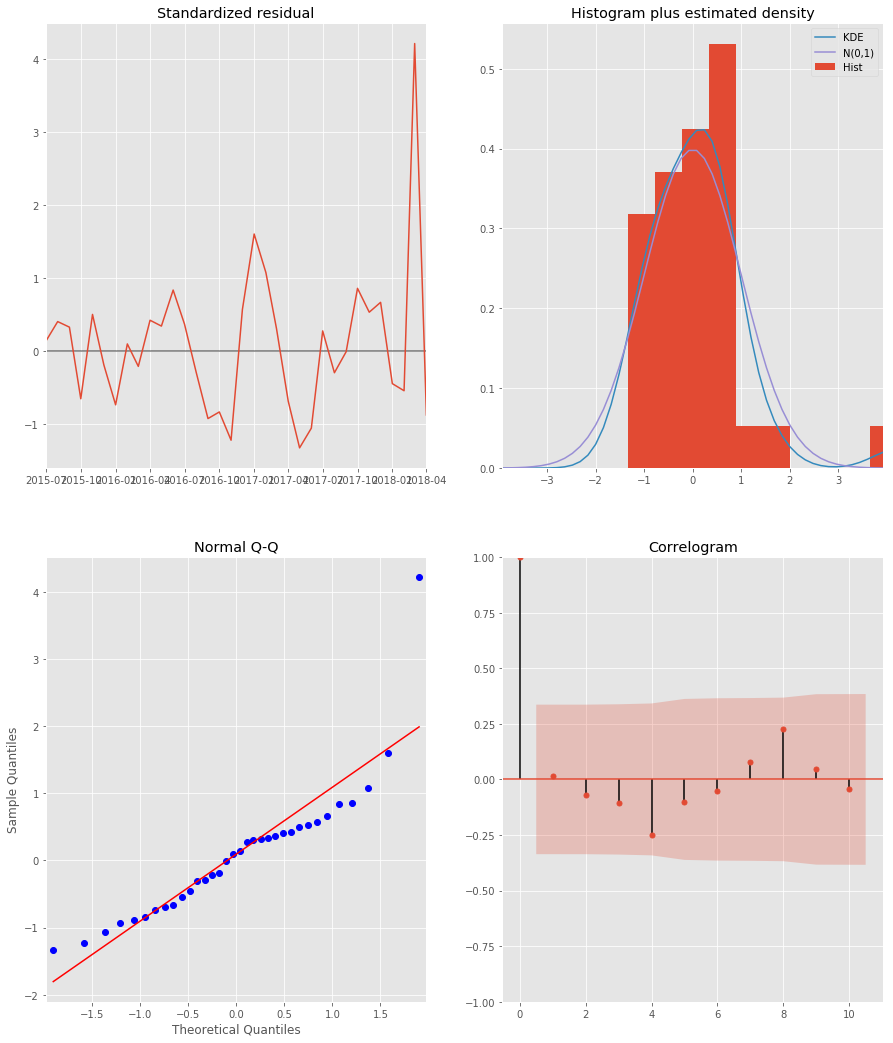

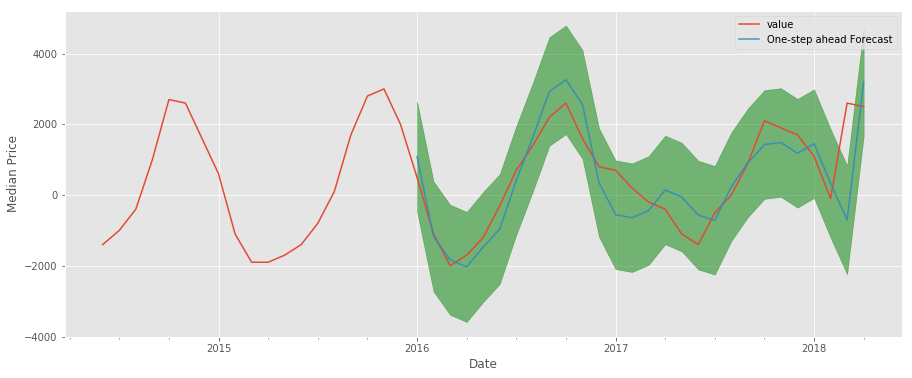

The Mean Squared Error of our forecasts is 726624.97


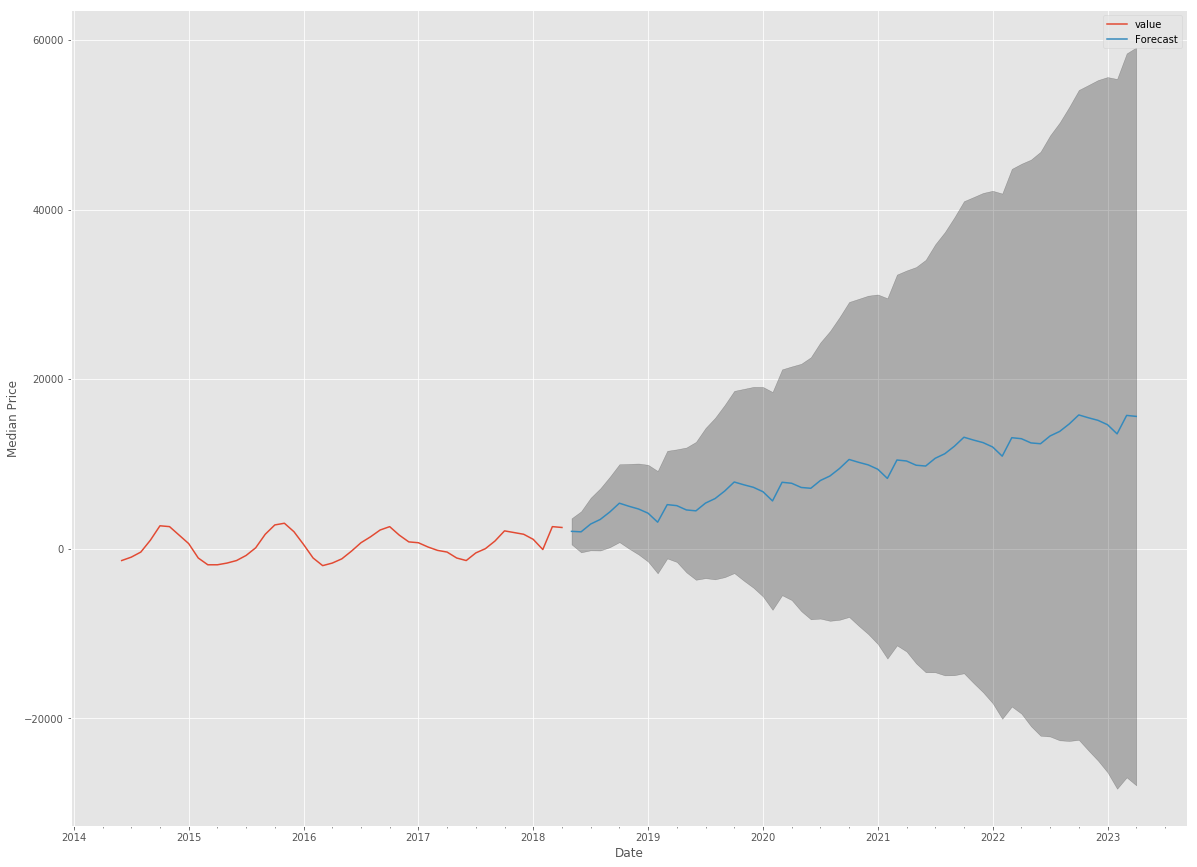

In [230]:
# def fitting_sarima(ts, order, seasonal_order):
#fitting the SARIMA model using the parameters choosen using lower AIC 
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(zip_27980_twodiff,
                                order=(1,1,0),
                                seasonal_order=(1,1,0,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()
print(output.summary().tables[1])

# Use plot_diagnostics with results calculated above.
output.plot_diagnostics(figsize=(15, 18))
plt.show()

pred = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_conf = pred.conf_int()
rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax =zip_27980_twodiff['2014':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5) # shade the area

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Median Price')
plt.legend()
plt.show()

# Compute the mean square error
zip_27980_forecasted = pred.predicted_mean
zip_27980_truth = zip_27980_twodiff['2016-01-01':].squeeze()
mse = ((zip_27980_forecasted - zip_27980_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Get forecast 60 steps ahead in future
prediction = output.get_forecast(steps=60)
# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()
ax =zip_27980_twodiff.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Price')
plt.legend()
plt.show()
    

##### on the estimated density plot:
we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.
##### The qq-plot:
It shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). this is an indication that the residuals are normally distributed.
##### The standardize residual plot:
The residuals over time don't display any obvious seasonality and appear to be white noise. 
##### correlogram plot:
Shows that the time series residuals have low correlation with lagged versions of itself.


### Auto ARIMA on Original data: 
Letting the SARIMA model find the right d value & fit it

In [190]:
zip_27980.head()

,value
time,
2017-12-01,122200.0
2018-01-01,126600.0
2018-02-01,130600.0
2018-03-01,137300.0
2018-04-01,143900.0


In [280]:
# def sarima_param(ts):

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(zip_27980 ,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))

        except:
            continue
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()] 

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =1300.4429972293176
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =992.1673000470898
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =898.1660333569114
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =1091.168061088076
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =830.1794425186499
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =921.3773130427076
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =557.2202284726872
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =1069.711039428512
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =1242.7309673858736
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =1005.2765515893917
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =854.276190064879
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =1149.1481674864062
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =986.1581142122272
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =939.0155975918562
ARIMA (0, 0, 1) x

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic           411.807
Name: 63, dtype: object

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9838      0.040     24.446      0.000       0.905       1.063
ma.L1         -0.8781      0.057    -15.304      0.000      -0.991      -0.766
ar.S.L12      -0.9186      0.084    -10.973      0.000      -1.083      -0.755
ma.S.L12       1.0720      0.094     11.437      0.000       0.888       1.256
sigma2      4.999e+05   1.77e-07   2.82e+12      0.000       5e+05       5e+05


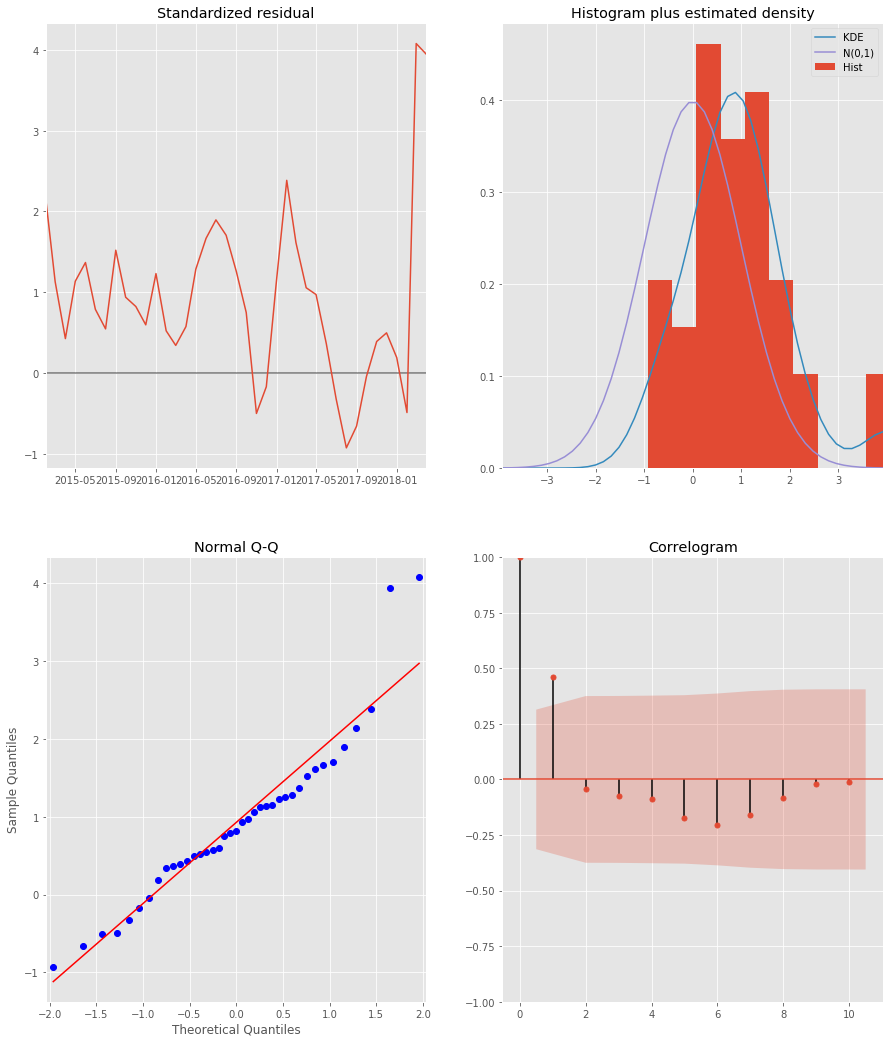

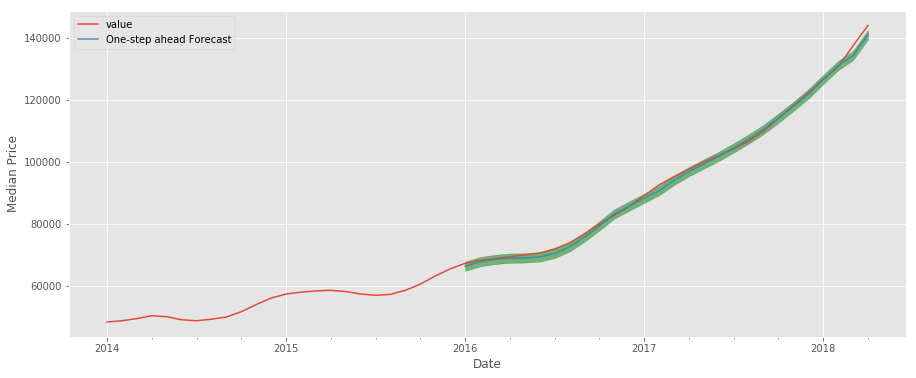

The Mean Squared Error of our forecasts is 1266497.32


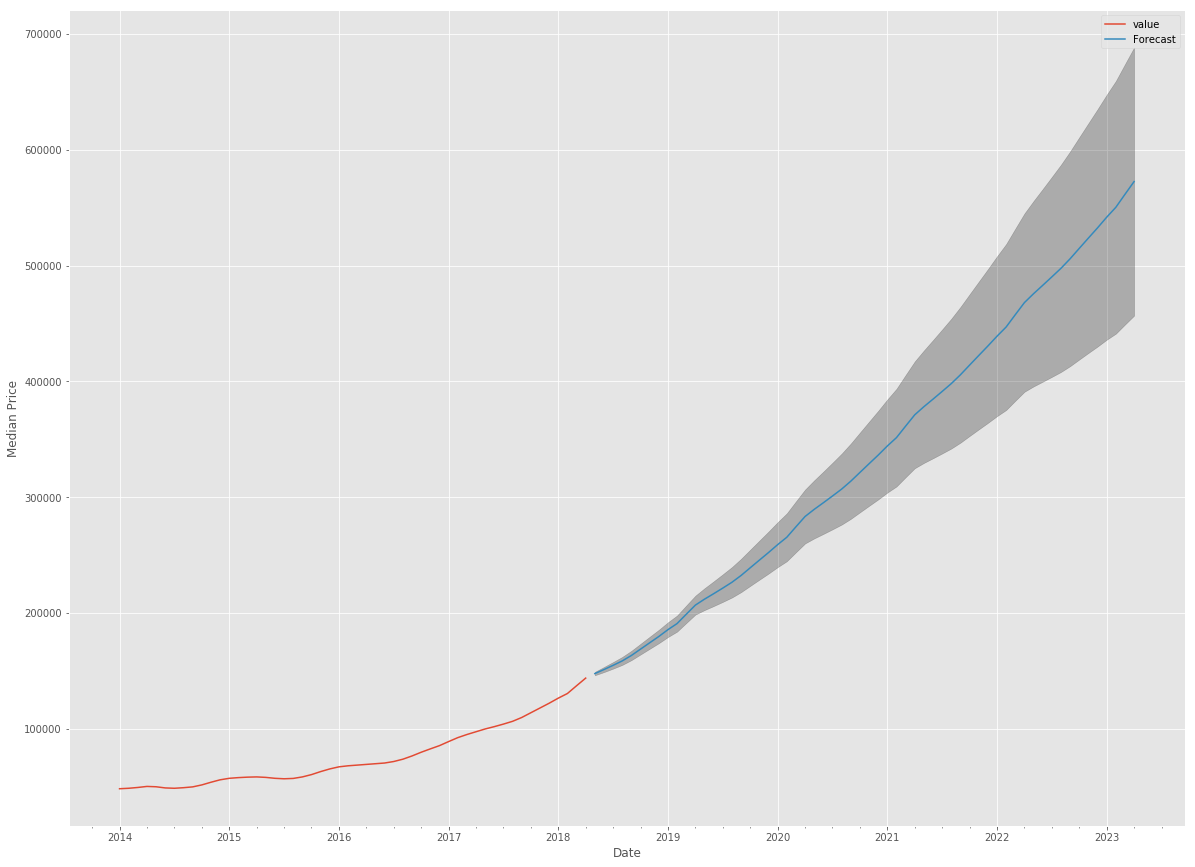

In [281]:
# def fitting_sarima(ts, order, seasonal_order):
#fitting the SARIMA model using the parameters choosen using lower AIC 
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(zip_27980,
                                order=(1,1,1),
                                seasonal_order=(1,1,1,12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()
print(output.summary().tables[1])

# Use plot_diagnostics with results calculated above.
output.plot_diagnostics(figsize=(15, 18))
plt.show()

pred = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_conf = pred.conf_int()
rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax =zip_27980['2014':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Median Price')
plt.legend()
plt.show()

# Compute the mean square error
zip_27980_forecasted = pred.predicted_mean
zip_27980_truth = zip_27980['2016-01-01':].squeeze()
mse = ((zip_27980_forecasted -zip_27980_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Get forecast 60 steps ahead in future
prediction = output.get_forecast(steps=60)
# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()
ax =zip_27980.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Price')
plt.legend()
plt.show()
# pred_27980 = output.forecast(36)

In [291]:
output1=output.forecast(36)
roi_2021_27980 = (output1[-1]-zip_27980.loc['2017-12-01'])/(zip_27980.loc['2017-12-01']) * 100
roi_2021_27980

value    45.806952
Name: 2017-12-01 00:00:00, dtype: float64

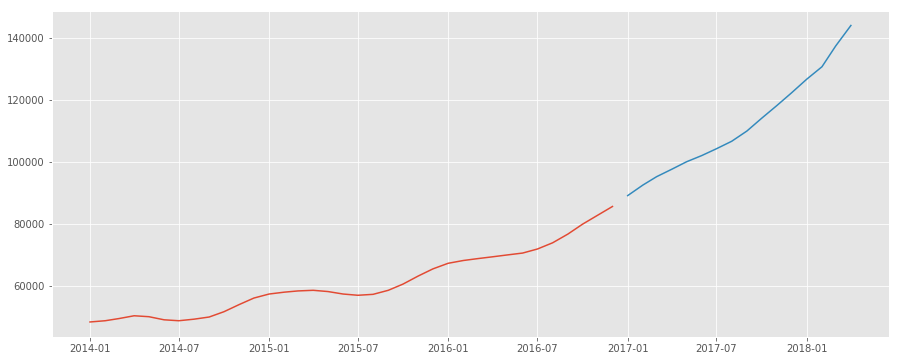

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=605.111, BIC=609.861, Fit time=0.078 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=898.702, BIC=900.286, Fit time=0.005 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=642.020, BIC=645.187, Fit time=0.034 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=877.833, BIC=881.000, Fit time=0.018 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=582.408, BIC=588.742, Fit time=0.135 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=579.097, BIC=583.848, Fit time=0.089 seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=583.097, BIC=591.015, Fit time=0.132 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.580 seconds
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:    

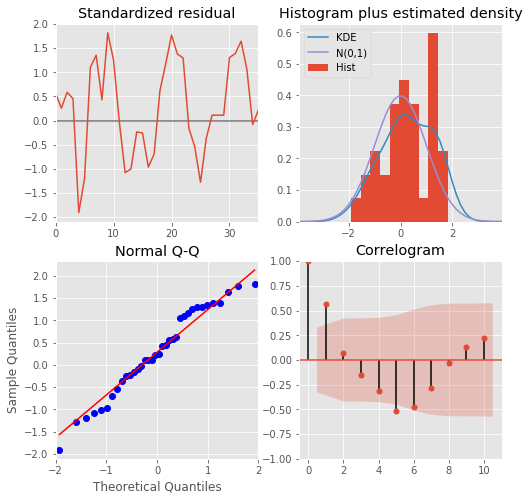

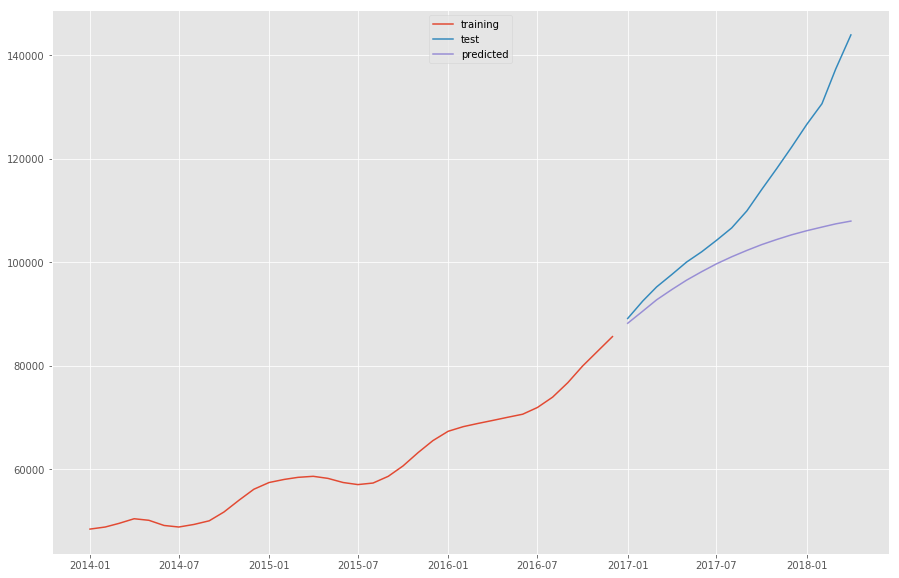

245282373.93113855


In [201]:
train1,test1 =zip_27980[:36],zip_27980[36:]
plt.plot(train1)
plt.plot(test1)
plt.show();                      
model1 = pm.auto_arima(train1, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=0,           # let model determine 'd'
                      seasonal= True,   # No Seasonality
                      start_P=0,start_Q=0,
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True,with_intercept=False)                     

print(model1.summary())
model1.plot_diagnostics(figsize=(8, 8))
plt.show()

# model.fit(train)
prediction1 = model1.predict(n_periods=len(test1))
prediction1 = pd.DataFrame(prediction1,index = test1.index,columns=['Predicted_value'])
plt.figure(figsize=(15,10))
plt.plot(train1,label='training')
plt.plot(test1,label='test')
plt.plot(prediction1,label='predicted')
plt.legend(loc='upper center')
plt.show();

test1['predicted_value']=prediction1
from sklearn.metrics import mean_squared_error
MSE1 = mean_squared_error(test1.value, test1.predicted_value)
print (MSE1)
# test1.head()

###### The model predicted 77% percent increase for zip code 27980 by 2022

## Zip code 30032

In [259]:
zip_30032.head()

,value
time,
2013-07-01,42600.0
2013-08-01,43600.0
2013-09-01,44800.0
2013-10-01,45700.0
2013-11-01,46000.0


In [293]:
# def sarima_param(ts):

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(zip_30032 ,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))

        except:
            continue
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()] 

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =1455.868839593725
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =29319.058904978876
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =1019.1097463832007
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =1517.270197392729
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =938.7644986120836
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =926.1566762032988
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =724.5095038324388
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =1628.9499320047087
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =1393.5517553969203
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =31301.21927288308
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =970.087216157162
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =2821.3104067580243
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =1135.1140798370113
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =1087.9702502072491
ARIMA (0, 0, 1

pdq         (1, 1, 0)
pdqs    (1, 1, 0, 12)
aic           530.719
Name: 54, dtype: object

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8259      0.108      7.617      0.000       0.613       1.038
ar.S.L12      -0.7729      0.247     -3.125      0.002      -1.258      -0.288
sigma2       7.85e+05   2.09e+05      3.749      0.000    3.75e+05     1.2e+06


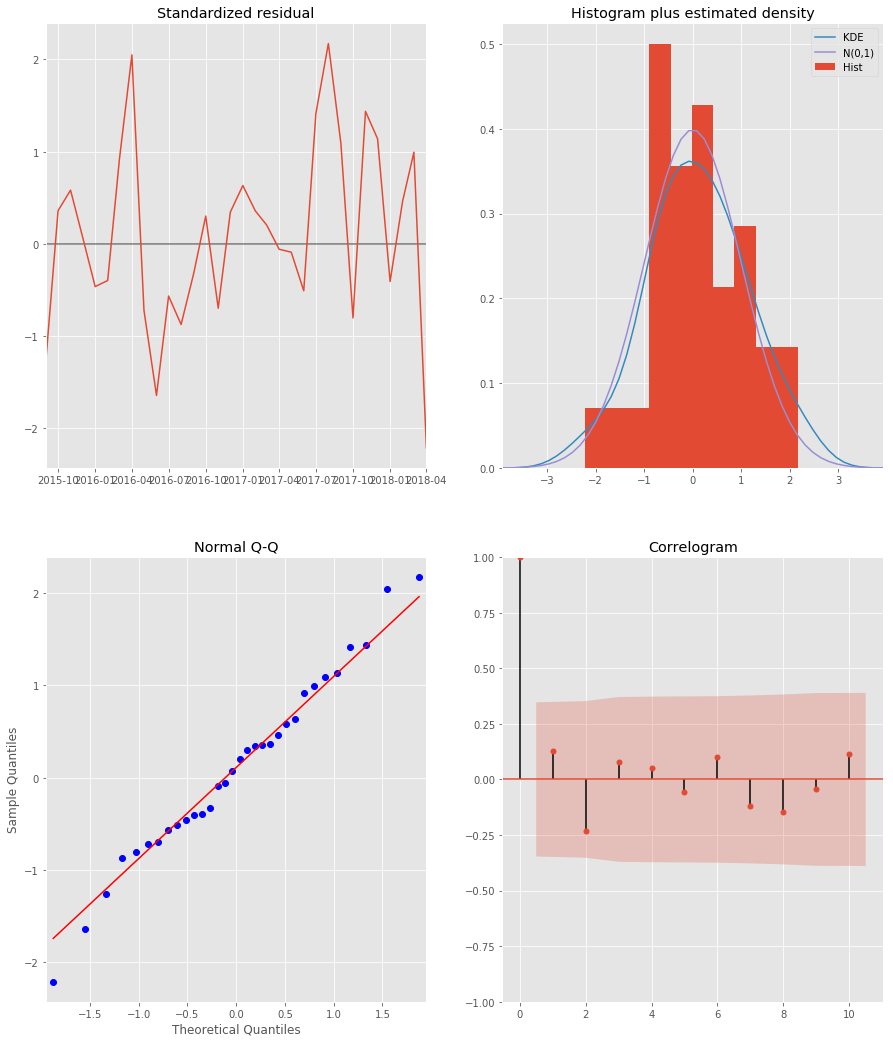

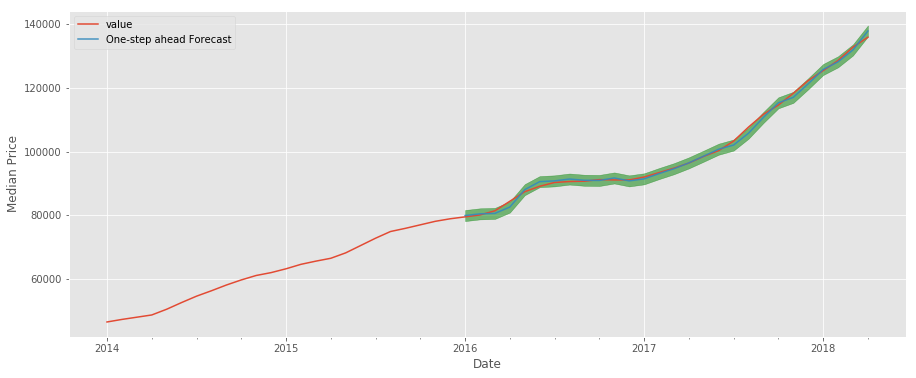

The Mean Squared Error of our forecasts is 827133.07


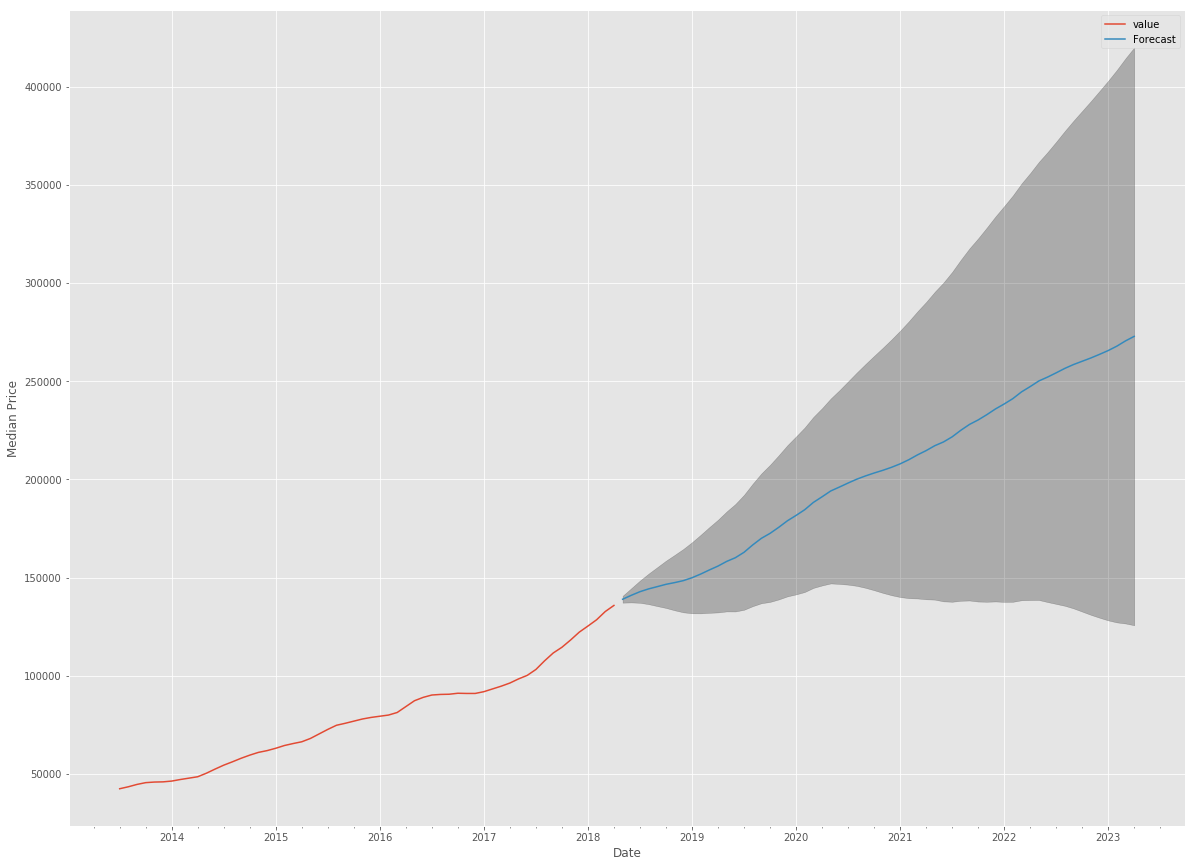

In [295]:
# def fitting_sarima(ts, order, seasonal_order):
#fitting the SARIMA model using the parameters choosen using lower AIC 
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(zip_30032,
                                order=(1,1,0),
                                seasonal_order=(1,1,0,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()
print(output.summary().tables[1])

# Use plot_diagnostics with results calculated above.
output.plot_diagnostics(figsize=(15, 18))
plt.show()
pred = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_conf = pred.conf_int()
rcParams['figure.figsize'] = 15, 6
#Plot observed values
ax =zip_30032['2014':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Median Price')
plt.legend()
plt.show()

# Compute the mean square error
zip_30032_forecasted = pred.predicted_mean
zip_30032_truth = zip_30032['2016-01-01':].squeeze()
mse = ((zip_30032_forecasted - zip_30032_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Get forecast 60 steps ahead in future
prediction = output.get_forecast(steps=60)
# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()
ax =zip_30032.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Price')
plt.legend()
plt.show()
    
    




In [296]:
output2=output.forecast(36)
roi_2021_30032 = (output2[-1]-zip_30032.loc['2017-12-01'])/(zip_30032.loc['2017-12-01']) * 100
roi_2021_30032

value    75.5435
Name: 2017-12-01 00:00:00, dtype: float64

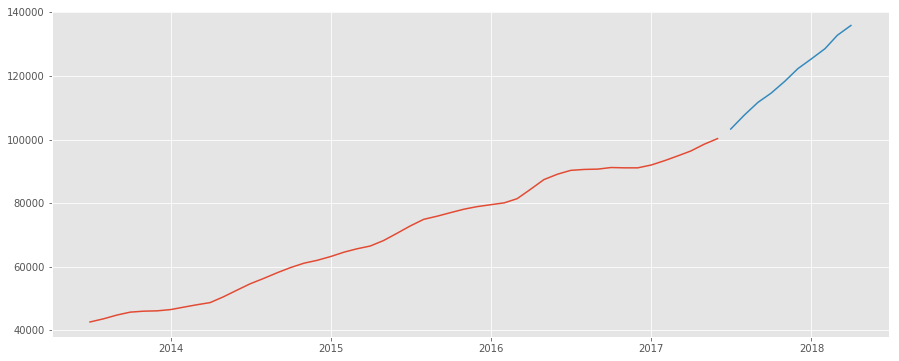

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=794.120, BIC=799.733, Fit time=0.081 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1213.164, BIC=1215.035, Fit time=0.006 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=845.335, BIC=849.078, Fit time=0.031 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1184.297, BIC=1188.040, Fit time=0.022 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=765.870, BIC=773.355, Fit time=0.128 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=756.403, BIC=762.017, Fit time=0.068 seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=752.629, BIC=761.985, Fit time=0.204 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=757.268, BIC=768.495, Fit time=0.410 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=7

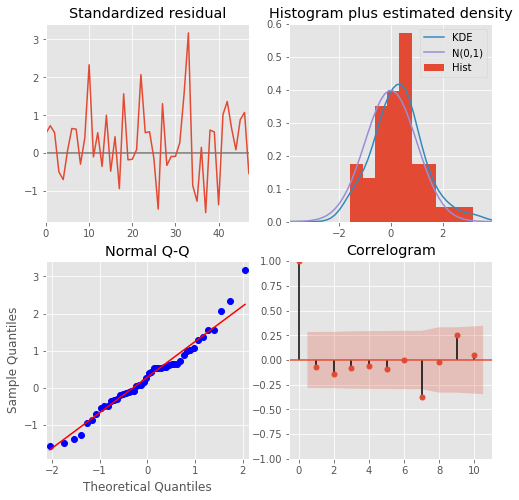

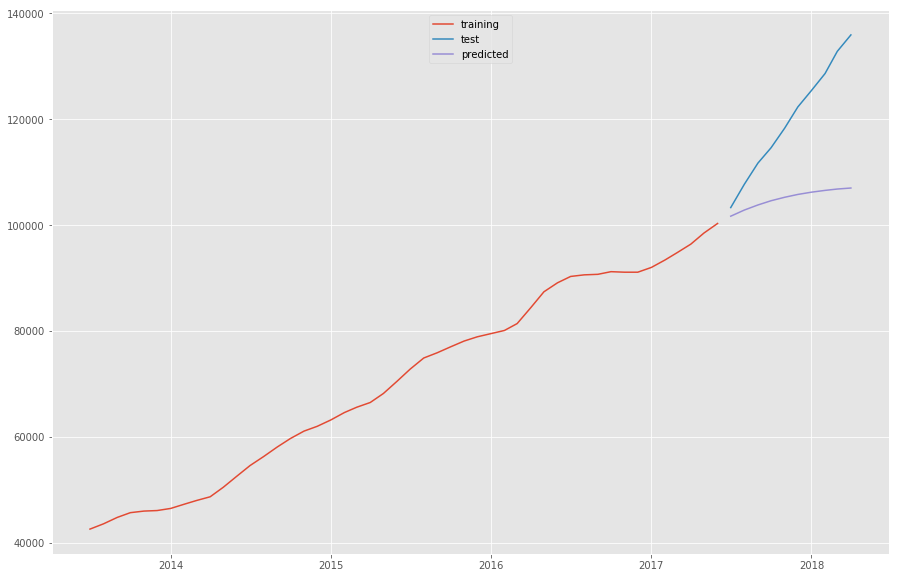

299845485.40408087


In [121]:
train4,test4 =zip_30032[:48],zip_30032[48:]
plt.plot(train4)
plt.plot(test4)
plt.show();                      
model4 = pm.auto_arima(train4, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=0,           # let model determine 'd'
                      seasonal= True,   # No Seasonality
                      start_P=0,start_Q=0,
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True,with_intercept=False)                     

print(model4.summary())
model4.plot_diagnostics(figsize=(8, 8))
plt.show()

# model.fit(train)
prediction4 = model4.predict(n_periods=len(test4))
prediction4= pd.DataFrame(prediction4,index = test4.index,columns=['Predicted_value'])
plt.figure(figsize=(15,10))
plt.plot(train4,label='training')
plt.plot(test4,label='test')
plt.plot(prediction4,label='predicted')
plt.legend(loc='upper center')
plt.show();

test4['predicted_value']=prediction4

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(test4.value, test4.predicted_value)
print (MSE)

## Zip code 33805

In [70]:
zip_33805 = zip_33805['2008-01-01':'2017-12-01']
zip_33805.head()

,value
time,
2013-01-01,47200.0
2013-02-01,46400.0
2013-03-01,45900.0
2013-04-01,45700.0
2013-05-01,45900.0


In [62]:
# def sarima_param(ts):

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(zip_33805 ,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))

        except:
            continue
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()] 

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =1470.8338856711482
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =27770.43866027417
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =1020.536600730601
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =1251.5187848234496
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =985.0696641790937
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =941.0628619959851
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =763.5982408701327
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =1348.4792234936795
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =1407.5703172381027
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =24507.315331178896
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =974.2557165655122
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =3074.3164674328154
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =1154.5056600837443
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =1108.4162667590256
ARIMA (0, 0,

pdq         (1, 1, 0)
pdqs    (1, 1, 0, 12)
aic           543.167
Name: 54, dtype: object

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8479      0.099      8.583      0.000       0.654       1.042
ar.S.L12      -0.7079      0.216     -3.275      0.001      -1.132      -0.284
sigma2      4.256e+05   1.15e+05      3.705      0.000       2e+05    6.51e+05


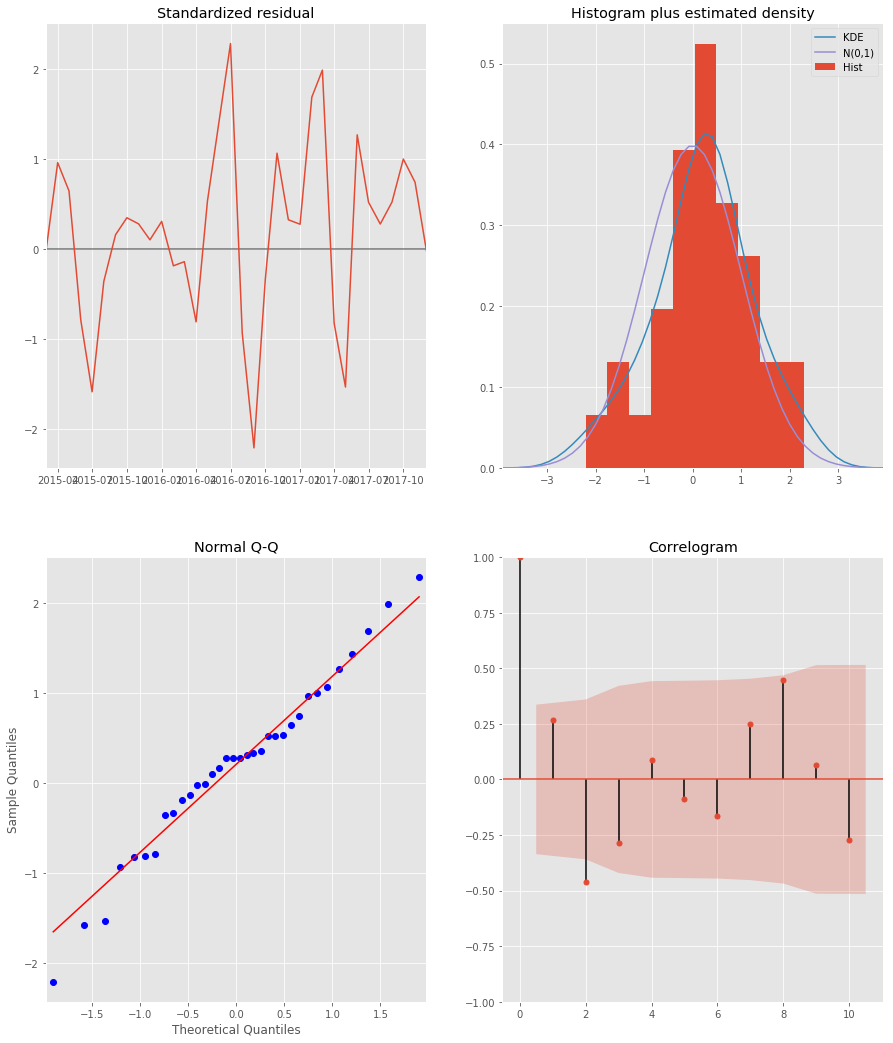

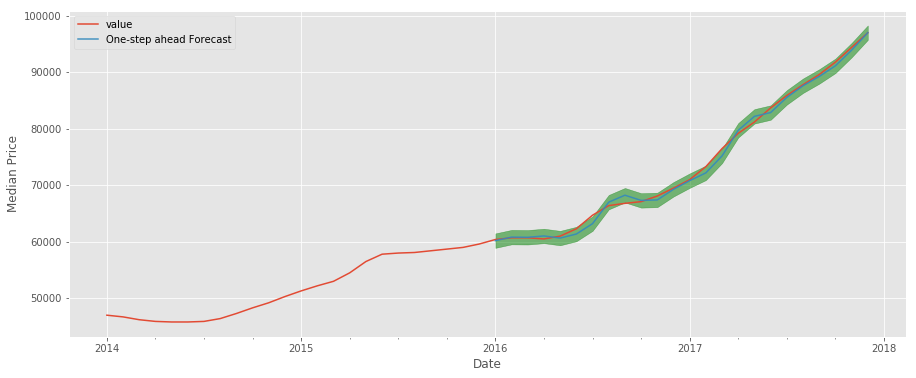

The Mean Squared Error of our forecasts is 517054.79


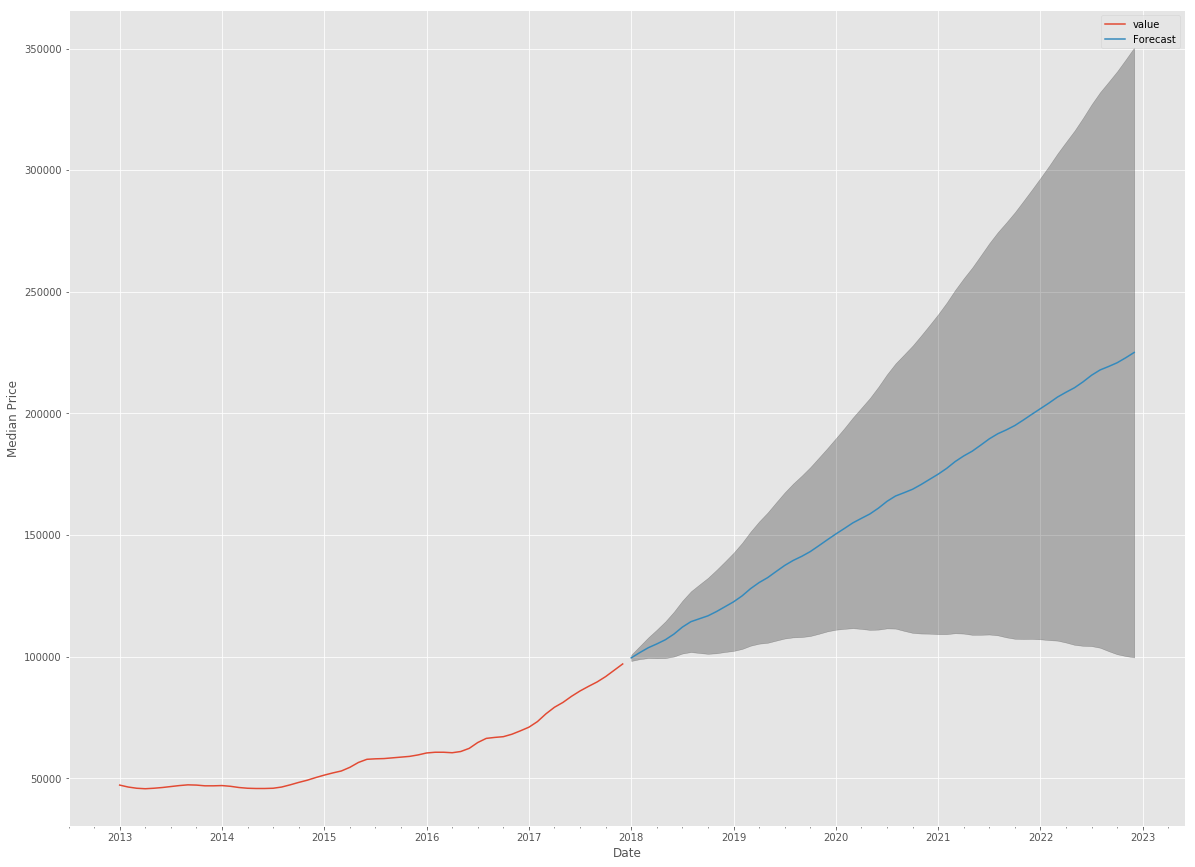

In [276]:
# def fitting_sarima(ts, order, seasonal_order):
#fitting the SARIMA model using the parameters choosen using lower AIC 
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(zip_33805,
                                order=(1,1,0),
                                seasonal_order=(1,1,0,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()
print(output.summary().tables[1])

# Use plot_diagnostics with results calculated above.
output.plot_diagnostics(figsize=(15, 18))
plt.show()

pred = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_conf = pred.conf_int()
rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax =zip_33805['2014':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Median Price')
plt.legend()
plt.show()

# Compute the mean square error
zip_33805_forecasted = pred.predicted_mean
zip_33805_truth = zip_33805['2016-01-01':].squeeze()
mse = ((zip_33805_forecasted - zip_33805_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Get forecast 60 steps ahead in future
prediction = output.get_forecast(steps=60)
# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()
ax =zip_33805.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Price')
plt.legend()
plt.show()
    

In [278]:
output3=output.forecast(36)
output3[-1]

172894.64885619716

In [279]:
roi_2021_33805 = (output3[-1]-zip_33805.loc['2017-12-01'])/(zip_33805.loc['2017-12-01']) * 100
roi_2021_33805

value    78.241906
Name: 2017-12-01 00:00:00, dtype: float64

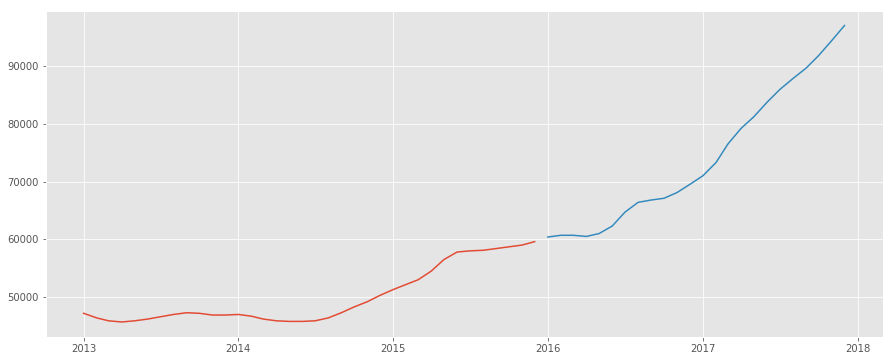

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 4); AIC=553.439, BIC=558.190, Fit time=0.087 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 4); AIC=883.572, BIC=885.156, Fit time=0.005 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 4); AIC=578.298, BIC=583.049, Fit time=0.097 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 4); AIC=804.454, BIC=809.205, Fit time=0.159 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 0, 4); AIC=544.197, BIC=550.531, Fit time=0.209 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 1, 4); AIC=546.046, BIC=553.964, Fit time=0.257 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 0, 1, 4); AIC=546.614, BIC=556.115, Fit time=0.714 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 0, 0, 4); AIC=856.773, BIC=861.524, Fit time=0.042 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(1, 0, 0, 4); AIC=523.013, BIC=530.931, Fit time=0.336 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(1, 0, 0, 4);

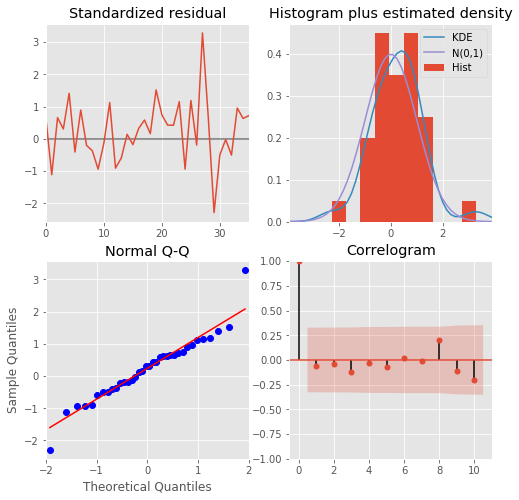

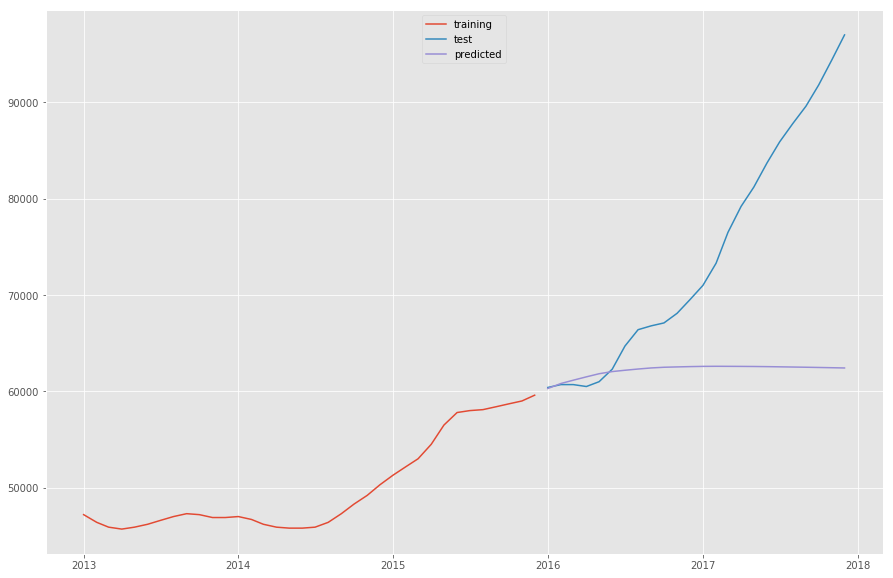

65611627.17541731


In [72]:
train2,test2 =zip_33805[:36],zip_33805[36:]
plt.plot(train2)
plt.plot(test2)
plt.show();                      
model2 = pm.auto_arima(train2, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=4,              # frequency of series
                      d=0,           # let model determine 'd'
                      seasonal= True,   # No Seasonality
                      start_P=0,start_Q=0,
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True,with_intercept=False)                     

print(model2.summary())
model2.plot_diagnostics(figsize=(8, 8))
plt.show()

# model.fit(train)
prediction2 = model2.predict(n_periods=len(test2))
prediction2= pd.DataFrame(prediction2,index = test2.index,columns=['Predicted_value'])
plt.figure(figsize=(15,10))
plt.plot(train2,label='training')
plt.plot(test2,label='test')
plt.plot(prediction2,label='predicted')
plt.legend(loc='upper center')
plt.show();

test2['predicted_value']=prediction2

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(test1.value, test1.predicted_value)
print (MSE)

## zip code 32117

In [297]:
zip_32117 = zip_32117['2008-01-01':'2017-12-01']

In [299]:
zip_32117.head

<bound method NDFrame.head of                value
time                
2008-01-01  127700.0
2008-02-01  124800.0
2008-03-01  121900.0
2008-04-01  119000.0
2008-05-01  116100.0
2008-06-01  112800.0
2008-07-01  109100.0
2008-08-01  105400.0
2008-09-01  101800.0
2008-10-01   98300.0
2008-11-01   95000.0
2008-12-01   91700.0
2009-01-01   88400.0
2009-02-01   85200.0
2009-03-01   81800.0
2009-04-01   78400.0
2009-05-01   74800.0
2009-06-01   71600.0
2009-07-01   69200.0
2009-08-01   67800.0
2009-09-01   66800.0
2009-10-01   65900.0
2009-11-01   65400.0
2009-12-01   65200.0
2010-01-01   65000.0
...              ...
2015-12-01   68500.0
2016-01-01   69100.0
2016-02-01   69800.0
2016-03-01   70500.0
2016-04-01   71200.0
2016-05-01   72000.0
2016-06-01   73000.0
2016-07-01   73900.0
2016-08-01   74900.0
2016-09-01   76400.0
2016-10-01   78300.0
2016-11-01   80200.0
2016-12-01   82200.0
2017-01-01   84300.0
2017-02-01   85800.0
2017-03-01   87500.0
2017-04-01   90000.0
2017-05-01   93000.0
2017

In [78]:
# def sarima_param(ts):

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(zip_32117 ,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))

        except:
            continue
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()] 

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =3003.3848764192803
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =143195.17869072314
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =2379.6627386978544
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =2048.0820706584464
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =2401.7837572086655
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =2350.690069063042
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =2044.045212029577
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =2493.3777429971906
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =2892.319983232976
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =136561.78476613548
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =2357.2877291844156
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =1909.3885858239835
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =2619.590565990134
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =2702.1420561474188
ARIMA (0, 

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic           1381.62
Name: 63, dtype: object

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9318      0.033     27.970      0.000       0.867       0.997
ma.L1          0.1863      0.050      3.698      0.000       0.088       0.285
ar.S.L12      -0.6097      0.100     -6.094      0.000      -0.806      -0.414
ma.S.L12      -0.0219      0.064     -0.343      0.731      -0.147       0.103
sigma2      1.457e+05   2.37e+04      6.158      0.000    9.93e+04    1.92e+05


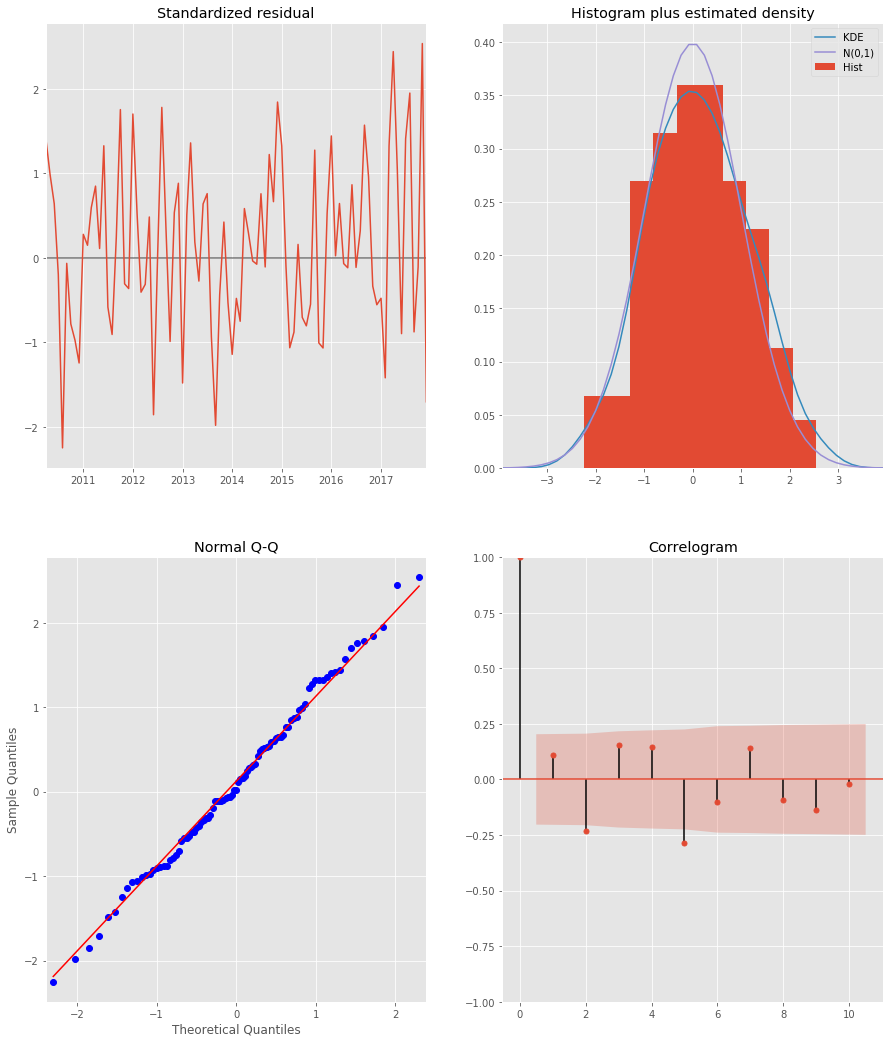

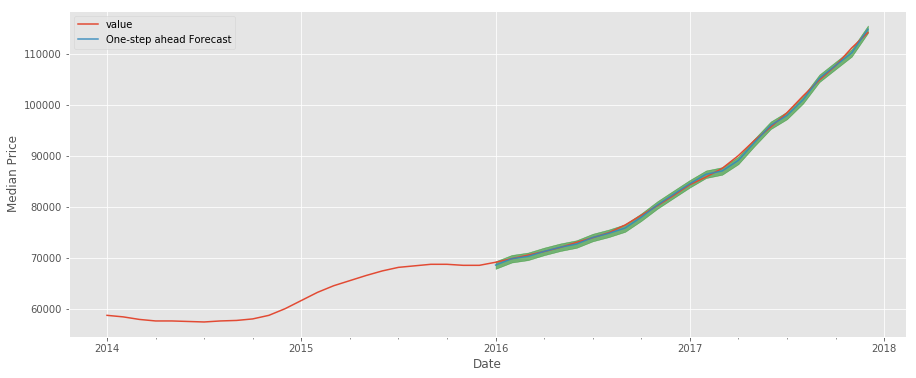

The Mean Squared Error of our forecasts is 212283.62


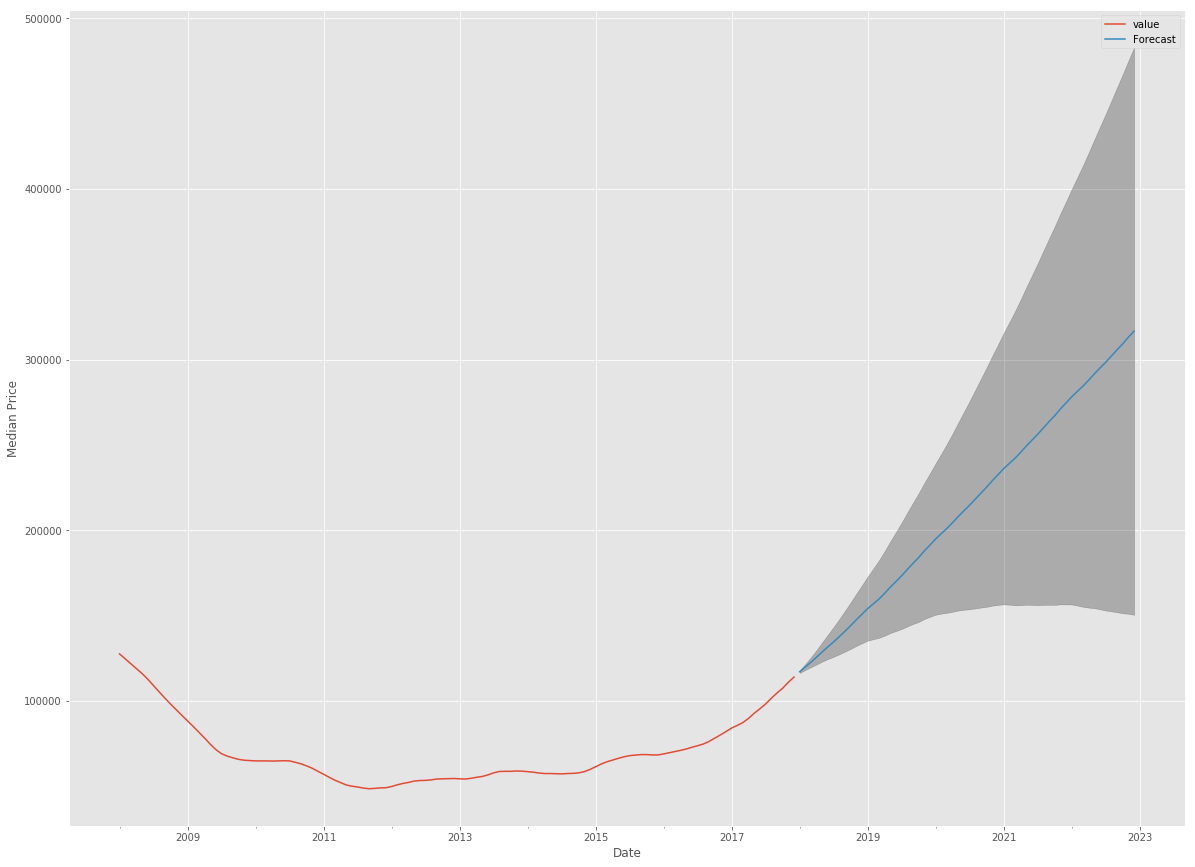

In [79]:
# def fitting_sarima(ts, order, seasonal_order):
#fitting the SARIMA model using the parameters choosen using lower AIC 
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(zip_32117,
                                order=(1,1,1),
                                seasonal_order=(1,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()
print(output.summary().tables[1])

# Use plot_diagnostics with results calculated above.
output.plot_diagnostics(figsize=(15, 18))
plt.show()

pred = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_conf = pred.conf_int()
rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax =zip_32117['2014':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Median Price')
plt.legend()
plt.show()

# Compute the mean square error
zip_32117_forecasted = pred.predicted_mean
zip_32117_truth = zip_32117['2016-01-01':].squeeze()
mse = ((zip_32117_forecasted - zip_32117_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Get forecast 60 steps ahead in future
prediction = output.get_forecast(steps=60)
# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()
ax =zip_32117.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Price')
plt.legend()
plt.show()
    

In [290]:
output4=output.forecast(36)
output4[-1]
roi_2021_32117 = (output4[-1]-zip_32117.loc['2017-12-01'])/(zip_32117.loc['2017-12-01']) * 100
roi_2021_32117

value    56.15784
Name: 2017-12-01 00:00:00, dtype: float64

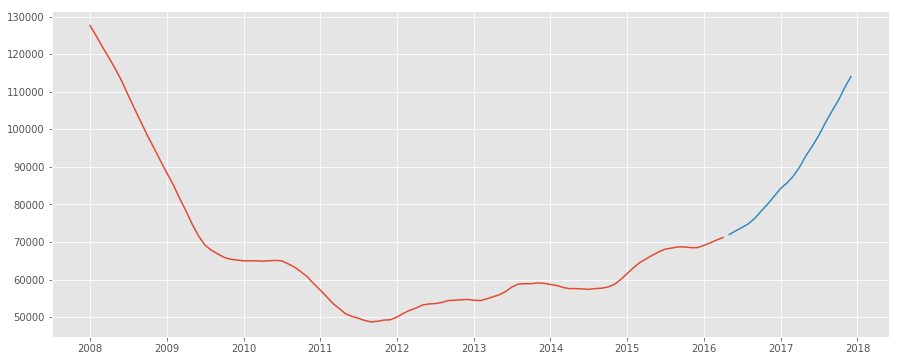

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 4); AIC=1654.931, BIC=1665.351, Fit time=0.276 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 4); AIC=2249.854, BIC=2255.065, Fit time=0.009 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 4); AIC=1771.901, BIC=1782.322, Fit time=0.237 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 4); AIC=2020.182, BIC=2030.602, Fit time=0.204 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 0, 4); AIC=1650.145, BIC=1663.171, Fit time=0.358 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 1, 4); AIC=1593.079, BIC=1608.710, Fit time=0.486 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 0, 2, 4); AIC=1556.557, BIC=1577.399, Fit time=1.127 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(2, 0, 2, 4); AIC=2120.653, BIC=2138.889, Fit time=0.513 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(2, 0, 2, 4); AIC=1418.474, BIC=1441.921, Fit time=0.623 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_o

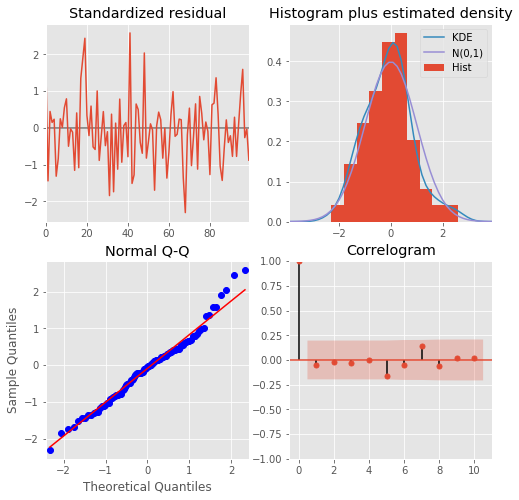

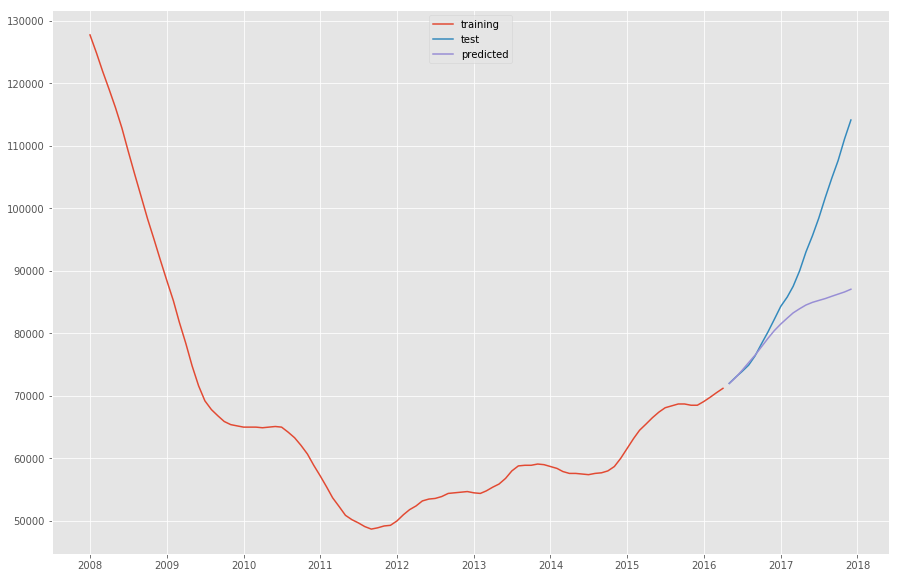

65611627.17541731


In [95]:
train2,test2 =zip_32117[:100],zip_32117[100:]
plt.plot(train2)
plt.plot(test2)
plt.show();                      
model2 = pm.auto_arima(train2, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=4,              # frequency of series
                      d=0,           # let model determine 'd'
                      seasonal= True,   # No Seasonality
                      start_P=0,start_Q=0,
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True,with_intercept=True)                     

print(model2.summary())
model2.plot_diagnostics(figsize=(8, 8))
plt.show()

# model.fit(train)
prediction2 = model2.predict(n_periods=len(test2))
prediction2= pd.DataFrame(prediction2,index = test2.index,columns=['Predicted_value'])
plt.figure(figsize=(15,10))
plt.plot(train2,label='training')
plt.plot(test2,label='test')
plt.plot(prediction2,label='predicted')
plt.legend(loc='upper center')
plt.show();

test2['predicted_value']=prediction2

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(test1.value, test1.predicted_value)
print (MSE)

## zip code 95134

In [306]:
zip_95134 =zip_95134.loc['2013-05-01':'2017-12-01']
zip_95134.head()

,value
time,
2013-05-01,865700.0
2013-06-01,861400.0
2013-07-01,845900.0
2013-08-01,831900.0
2013-09-01,822800.0


In [307]:
# def sarima_param(ts):

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(zip_95134 ,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))

        except:
            continue
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()] 

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =1677.376833759602
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =8357130.605733445
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =1147.0077809985642
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =2773.469129696668
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =1145.8756066770839
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =1110.301394805093
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =863.4767018352402
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =2758.014912817342
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =1610.7412936419507
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =8589102.389110895
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =1154.7357112614498
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =nan
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =1417.5969181729854
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =1245.721292496422
ARIMA (0, 0, 1) x (1, 1, 0, 1

pdq         (1, 1, 0)
pdqs    (1, 1, 0, 12)
aic           643.654
Name: 54, dtype: object

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9256      0.095      9.774      0.000       0.740       1.111
ar.S.L12      -0.5455      0.276     -1.977      0.048      -1.086      -0.005
sigma2      1.253e+08   2.79e-10    4.5e+17      0.000    1.25e+08    1.25e+08


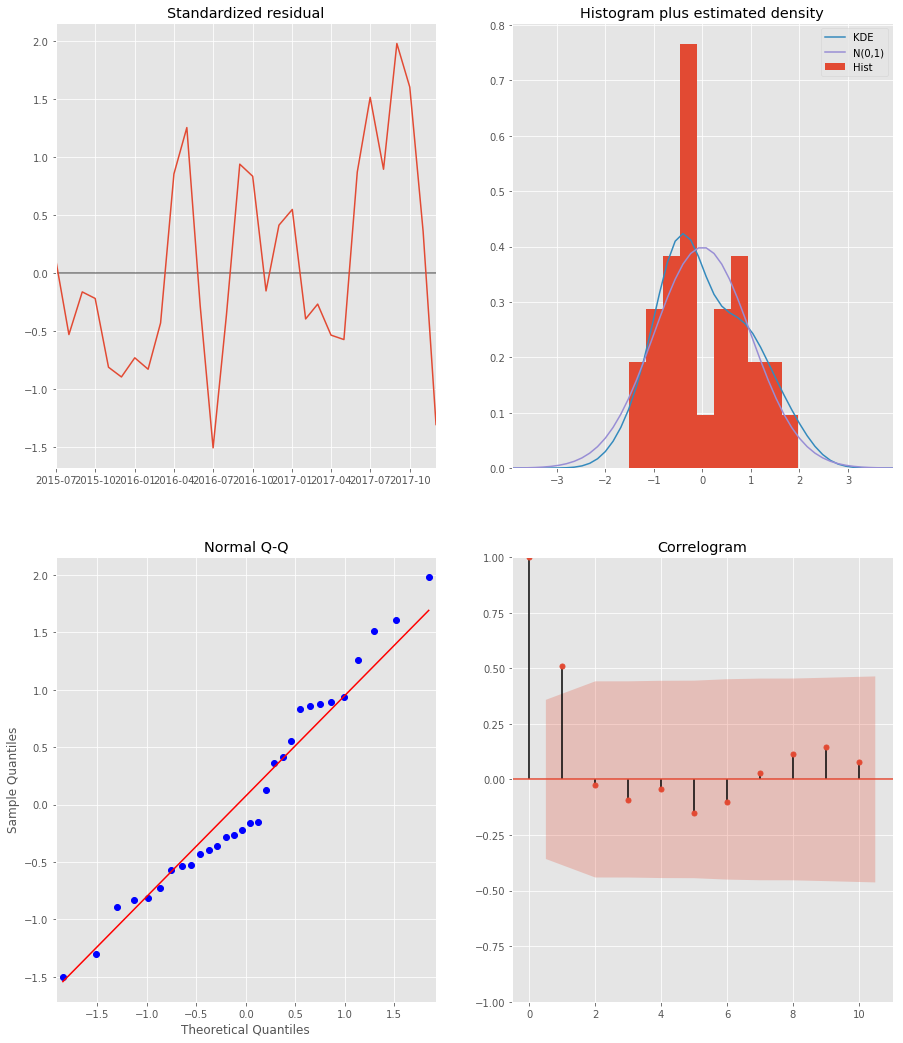

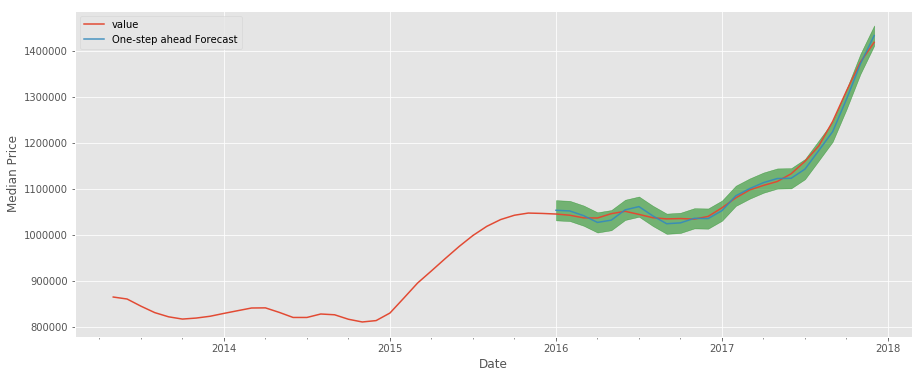

The Mean Squared Error of our forecasts is 111217077.76


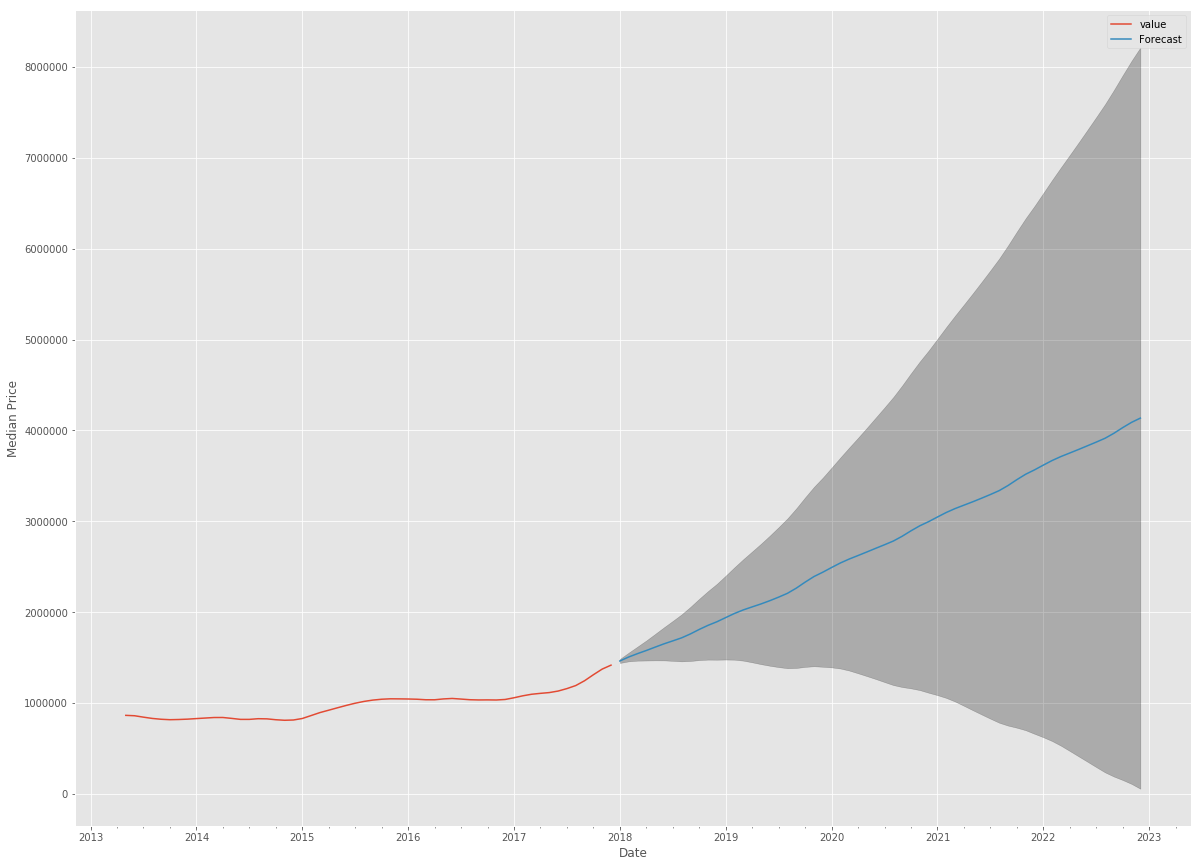

In [308]:
# def fitting_sarima(ts, order, seasonal_order):
#fitting the SARIMA model using the parameters choosen using lower AIC 
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(zip_95134,
                                order=(1,1,0),
                                seasonal_order=(1,1,0,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()
print(output.summary().tables[1])

# Use plot_diagnostics with results calculated above.
output.plot_diagnostics(figsize=(15, 18))
plt.show()

pred = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_conf = pred.conf_int()
rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax =zip_95134['2008':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Median Price')
plt.legend()
plt.show()

# Compute the mean square error
zip_95134_forecasted = pred.predicted_mean
zip_95134_truth = zip_95134['2016-01-01':].squeeze()
mse = ((zip_95134_forecasted - zip_95134_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Get forecast 60 steps ahead in future
prediction = output.get_forecast(steps=60)
# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()
ax =zip_95134.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Price')
plt.legend()
plt.show()
    

In [309]:
output3=output.forecast(36)
roi_2021_95134 = (output3[-1]-zip_95134.loc['2017-12-01'])/(zip_95134.loc['2017-12-01']) * 100
roi_2021_95134

value    111.33155
Name: 2017-12-01 00:00:00, dtype: float64

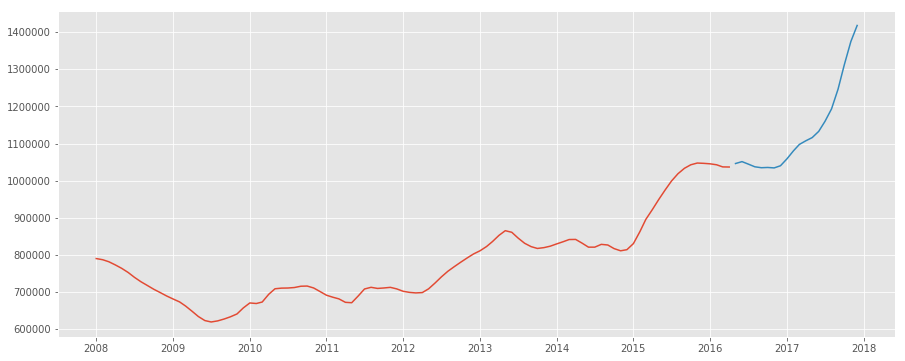

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=2050.756, BIC=2058.572, Fit time=0.173 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=3001.380, BIC=3003.985, Fit time=0.004 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=2168.396, BIC=2173.606, Fit time=0.038 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=2932.333, BIC=2937.543, Fit time=0.025 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1975.519, BIC=1985.940, Fit time=0.214 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=2039.209, BIC=2047.025, Fit time=0.096 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1963.521, BIC=1979.152, Fit time=0.374 seconds
Fit ARIMA: order=(4, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1963.097, BIC=1981.333, Fit time=0.529 seconds
Fit ARIMA: order=(4, 0, 1) seasonal_order=(0, 0, 

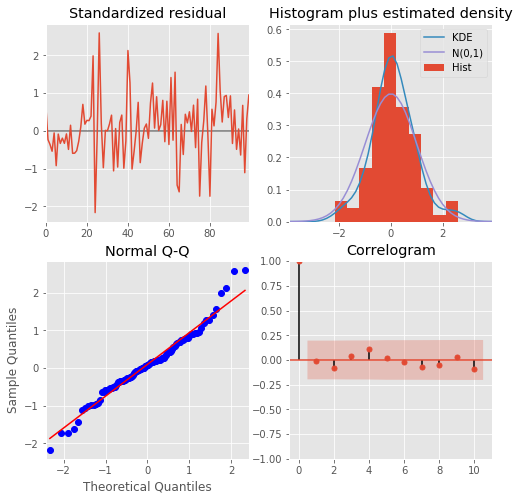

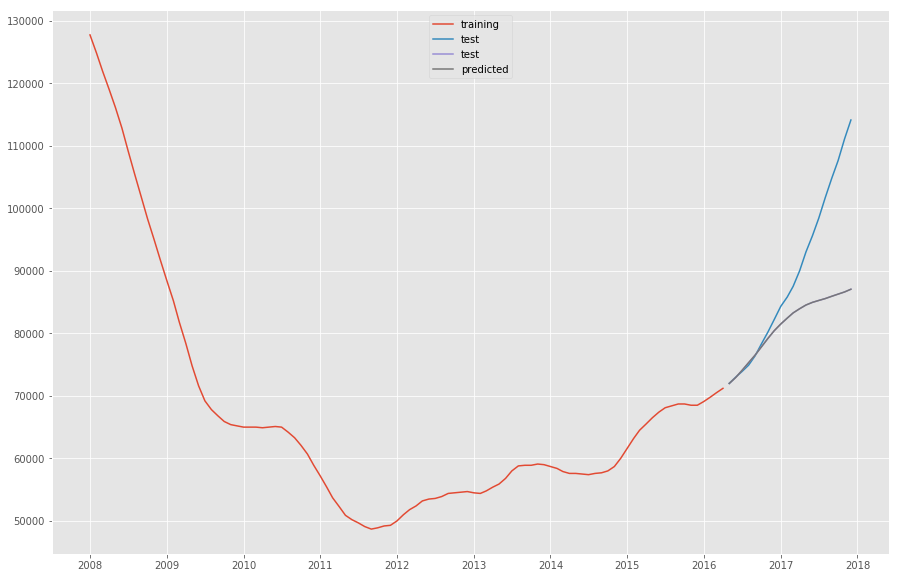

40009996861.19396


In [93]:
train3,test3 =zip_95134[:100],zip_95134[100:]
plt.plot(train3)
plt.plot(test3)
plt.show();                      
model3 = pm.auto_arima(train3, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=0,           # let model determine 'd'
                      seasonal= True,   # No Seasonality
                      start_P=0,start_Q=0,
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True,with_intercept=False)                     

print(model3.summary())
model3.plot_diagnostics(figsize=(8, 8))
plt.show()

# model.fit(train)
prediction3 = model2.predict(n_periods=len(test3))
prediction3= pd.DataFrame(prediction3,index = test3.index,columns=['Predicted_value'])
plt.figure(figsize=(15,10))
plt.plot(train2,label='training')
plt.plot(test2,label='test')
plt.plot(prediction2,label='predicted')
plt.legend(loc='upper center')
plt.show();

test3['predicted_value']=prediction3

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(test3.value, test3.predicted_value)
print (MSE)

In [ ]:
model_1 = pm.auto_arima(zip_27980, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=0,           # let model determine 'd'
                      seasonal= True,   # No Seasonality
                      start_P=0,start_Q=0,
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True,with_intercept=False)                     

print(model_1.summary())
model_1.plot_diagnostics(figsize=(8, 8))
plt.show()
auto_pred_27980= model_1.predict(n_periods= 60)
auto_pred_27980
roi_2022= (auto_pred_27980[-1]-zip_27980.loc['2017-12-01'])/(zip_27980.loc['2017-12-01']) * 100
roi_2022

## zip code 28208 Charlotte NC

In [182]:
zip_28208.head()

,value
time,
2013-01-01,50000.0
2013-02-01,50700.0
2013-03-01,52500.0
2013-04-01,53000.0
2013-05-01,52500.0


In [114]:
# def sarima_param(ts):

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(zip_28208 ,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))

        except:
            continue
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()] 

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =1482.9193705384853
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =1168.400794650554
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =1017.944690683201
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =1333.0848387357764
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =964.9954809092303
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =935.9738460394224
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =718.1730668172135
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =992.0985586428769
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =1461.713971471942
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =1171.3735894260085
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =999.026338104075
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =2935.4980126306637
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =1163.968819672216
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =1180.862800280869
ARIMA (0, 0, 1) x

pdq         (1, 1, 1)
pdqs    (1, 1, 0, 12)
aic           518.409
Name: 62, dtype: object

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6061      0.171      3.551      0.000       0.272       0.941
ma.L1          0.7423      0.125      5.935      0.000       0.497       0.987
ar.S.L12       0.0014      0.049      0.028      0.978      -0.095       0.098
sigma2      1.825e+05    5.5e+04      3.316      0.001    7.47e+04     2.9e+05


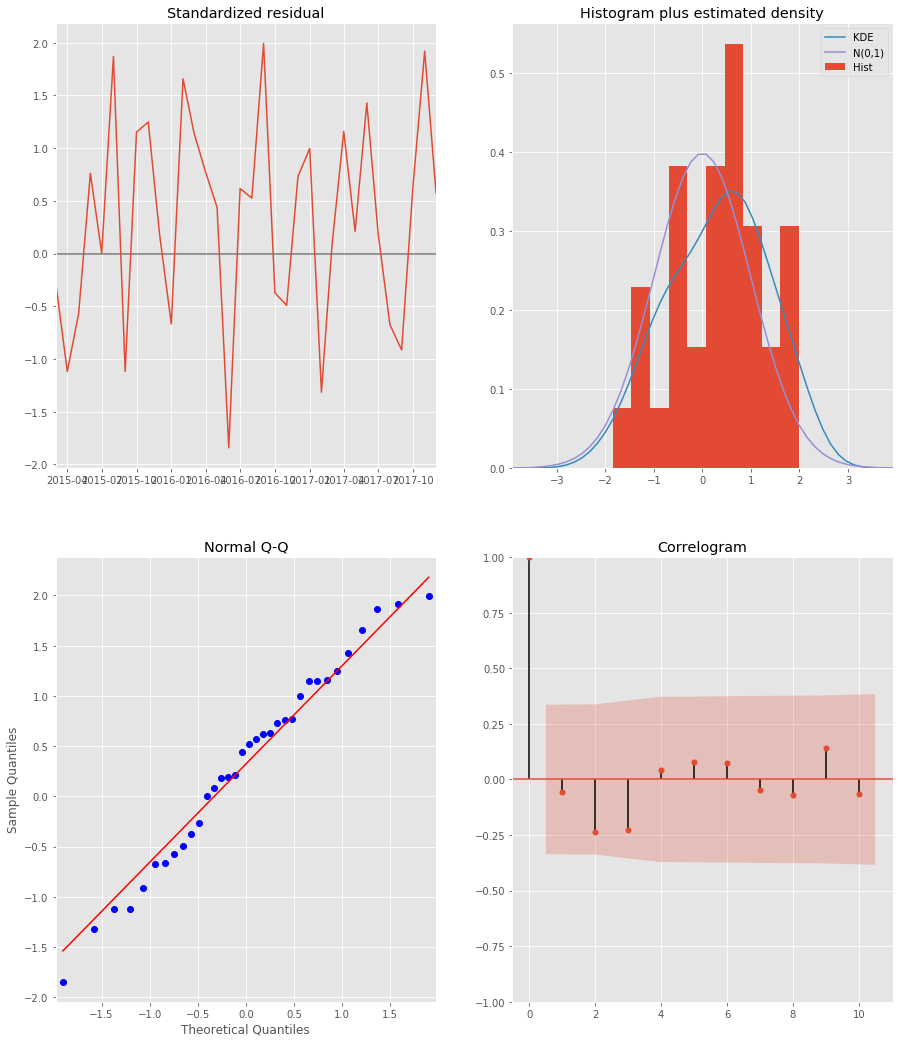

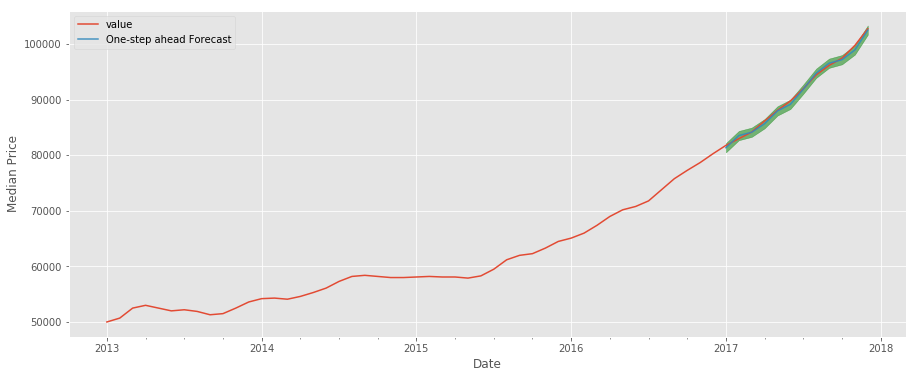

The Mean Squared Error of our forecasts is 181024.51


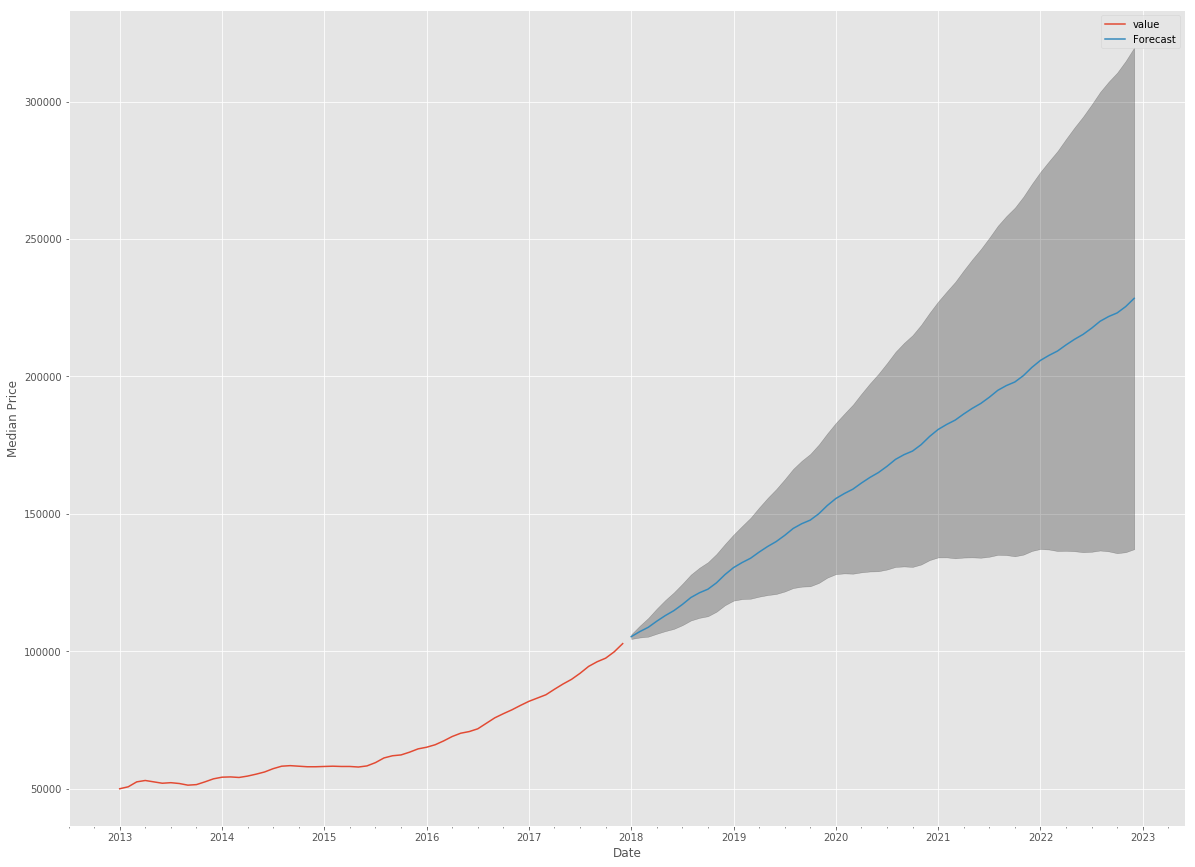

In [288]:
# def fitting_sarima(ts, order, seasonal_order):
#fitting the SARIMA model using the parameters choosen using lower AIC 
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(zip_28208,
                                order=(1,1,1),
                                seasonal_order=(1,1,0,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()
print(output.summary().tables[1])

# Use plot_diagnostics with results calculated above.
output.plot_diagnostics(figsize=(15, 18))
plt.show()

pred = output.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_conf = pred.conf_int()
rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax =zip_28208['2013':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)
#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Median Price')
plt.legend()
plt.show()

# Compute the mean square error
zip_28208_forecasted = pred.predicted_mean
zip_28208_truth = zip_28208['2017-01-01':].squeeze()
mse = ((zip_28208_forecasted - zip_28208_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Get forecast 60 steps ahead in future
prediction = output.get_forecast(steps=60)
# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()
ax =zip_28208.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Price')
plt.legend()
plt.show()
    

In [289]:
output6=output.forecast(36)
output6[-1]
roi_2021_28208 = (output6[-1]-zip_28208.loc['2017-12-01'])/(zip_28208.loc['2017-12-01']) * 100
roi_2021_28208

value    73.32305
Name: 2017-12-01 00:00:00, dtype: float64

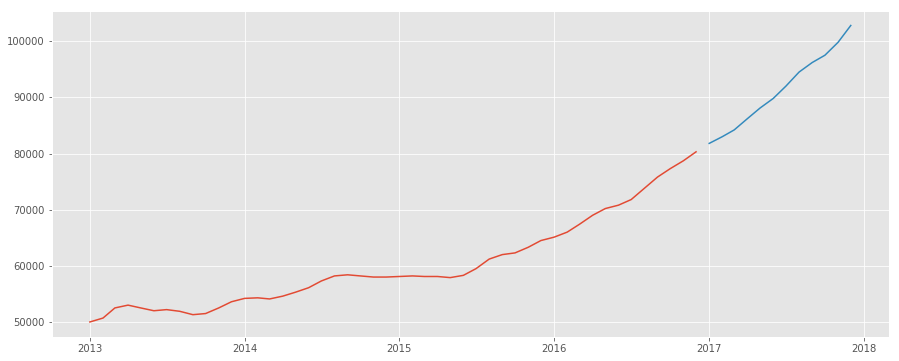

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=765.801, BIC=771.414, Fit time=0.099 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1195.537, BIC=1197.408, Fit time=0.006 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=806.893, BIC=810.635, Fit time=0.038 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1136.208, BIC=1139.950, Fit time=0.049 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=773.935, BIC=781.420, Fit time=0.152 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=743.315, BIC=750.800, Fit time=0.115 seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=748.344, BIC=759.572, Fit time=0.201 seconds
Fit ARIMA: order=(0, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1161.493, BIC=1167.107, Fit time=0.029 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=745.429, BIC=754.785, Fit time=0.279 seconds
Fit ARIMA: order=(1, 0, 3) seasonal_order=(0, 0, 

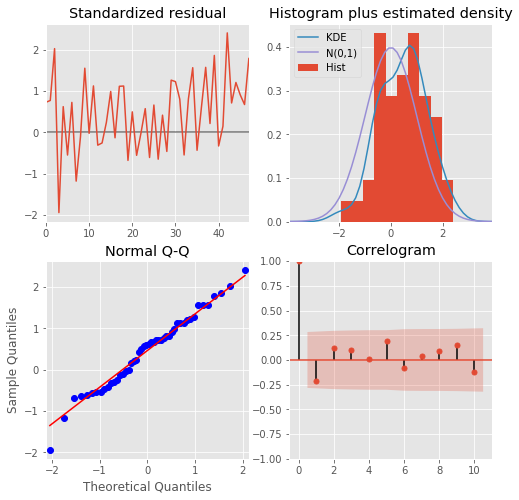

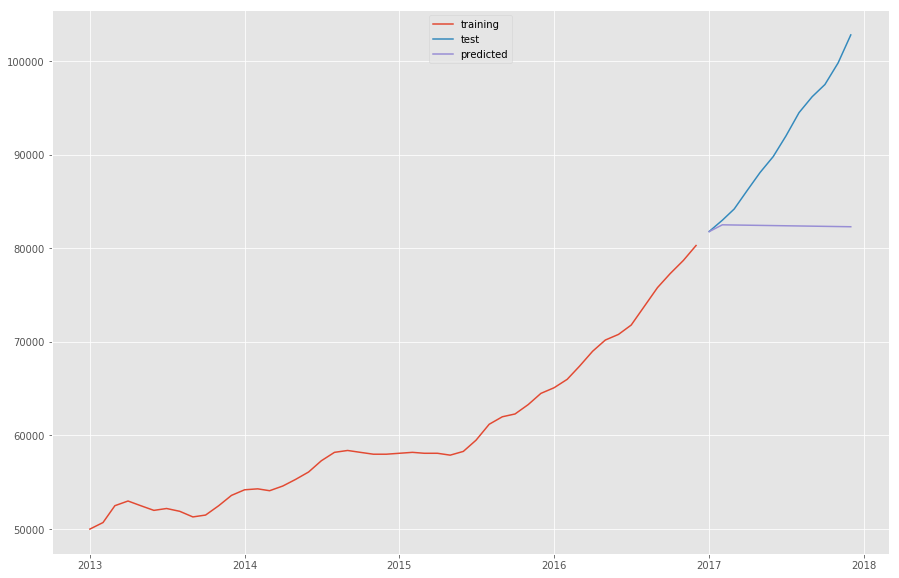

124055609.79494123


In [113]:
train6,test6 =zip_28208[:48],zip_28208[48:]
plt.plot(train6)
plt.plot(test6)
plt.show();                      
model6 = pm.auto_arima(train6, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=0,           # let model determine 'd'
                      seasonal= True,   # No Seasonality
                      start_P=0,start_Q=0,
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True,with_intercept=False)                     

print(model6.summary())
model6.plot_diagnostics(figsize=(8, 8))
plt.show()

# model.fit(train)
prediction6 = model6.predict(n_periods=len(test6))
prediction6= pd.DataFrame(prediction6,index = test6.index,columns=['Predicted_value'])
plt.figure(figsize=(15,10))
plt.plot(train6,label='training')
plt.plot(test6,label='test')
plt.plot(prediction6,label='predicted')
plt.legend(loc='upper center')
plt.show();

test6['predicted_value']=prediction6

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(test6.value, test6.predicted_value)
print (MSE)

# Step 6: Interpreting Results

##### Zip code 95134 is exclude from the list of zip code due to model accuracy and the rest 5 zip codes are finalized. the model has wider confidence interval beyond 2021. So that we will be forecasting and using the next 36 months only. The rate of increase is calculated between 2018 & 2021 for each zip code and according to the the ROI value the following is recommended:  

#####  For the following zip codes with high ROI by 2021 , rent the house for a while & sale it when the price go up. 
  
###### Zip code 28208 Charlotte, NC , ROI of 73% by 2021

###### Zip code 33805 Lakeland, Fl ,ROI of 78% by 2021

###### Zip code 30032 Candler-Mcafee,GA ,ROI of 76% by 2021




##### Due to the lower ROI by 2021 remodeling and selling is the best choice

###### Zip code 27980 Hertfold, NC , ROI of 45 % by 2021

###### Zip code 32117 Holly Hill,Fl ,ROI of 56% by 2021
